In [1]:
import pandas as pd
import numpy as np
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

config = {
    "mathtext.fontset": 'stix',
    "font.family":'DejaVu Sans',
    "font.family": 'serif',
    "font.serif": ['Arial'],
    "font.size": 24,
    'axes.unicode_minus': False
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large,
    'legend.fontsize': med,
    'figure.figsize': (8, 6),
    'axes.labelsize': med,
    'axes.titlesize': med,
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 400
seed = 42

In [2]:
dp = pd.read_csv('./data/db_cn.csv')
dp = dp[['formula_pretty']]

In [13]:
mp_data = pd.read_csv('./data/mp.csv')

In [14]:
mp_data_non_dp = mp_data[mp_data['spacegroup_number']!=225]
mp_data_non_dp

material_id formula_pretty  formation_energy_per_atom  \
0      mp-1229171       Ag6S2IBr                  -0.297775   
1       mp-556434     AgBi(PS3)2                  -0.560316   
2       mp-569126    AgBi(PSe3)2                  -0.470836   
3      mp-1202255    AgSb(SeF3)2                  -1.918201   
4       mp-560633      Al2SnCl6O                  -2.080811   
...           ...            ...                        ...   
33714  mp-2217275       MgMnV2O6                  -2.469136   
33715  mp-2217451       MgMnV2O6                  -2.468556   
33716  mp-2223878     MgMo(WS3)2                  -1.005663   
33717  mp-2226971     MgMo(WS3)2                  -0.999554   
33718  mp-2239906     MgMo(WS3)2                  -0.983191   

       energy_above_hull  is_gap_direct  band_gap  spacegroup_number  \
0               0.081145          False    0.5861                 42   
1               0.000000          False    1.1838                  2   
2               0.000000          False    1.2778                148   
3               0.029712           True    1.1750                 15   
4               0.000000          False    3.7793                 14   
...                  ...            ...       ...                ...   
33714           0.076003          False    1.3969                  8   
33715           0.076583          False    0.9750                  8   
33716           0.206342          False    0.0000                156   
33717           0.212451          False    0.0000                156   
33718           0.228813          False    0.0000                  8   

                                               structure  
0      Full Formula (Ag6 S2 I1 Br1)\nReduced Formula:...  
1      Full Formula (Ag2 Bi2 P4 S12)\nReduced Formula...  
2      Full Formula (Ag2 Bi2 P4 Se12)\nReduced Formul...  
3      Full Formula (Ag6 Sb6 Se12 F36)\nReduced Formu...  
4      Full Formula (Al8 Sn4 Cl24 O4)\nReduced Formul...  
...                                                  ...  
33714  Full Formula (Mg1 Mn1 V2 O6)\nReduced Formula:...  
33715  Full Formula (Mg1 Mn1 V2 O6)\nReduced Formula:...  
33716  Full Formula (Mg1 Mo1 W2 S6)\nReduced Formula:...  
33717  Full Formula (Mg1 Mo1 W2 S6)\nReduced Formula:...  
33718  Full Formula (Mg1 Mo1 W2 S6)\nReduced Formula:...  

[15092 rows x 8 columns]

In [15]:
import re
pattern = r'^([A-Z][a-z]?)2([A-Z][a-z]?)([A-Z][a-z]?)(F|Cl|Br|I)6$'
db1 = mp_data_non_dp[mp_data_non_dp['formula_pretty'].str.match(pattern)]
db1 = db1.reset_index(drop=True)
db1 = db1[['formula_pretty']]
db1_formulas = set(db1['formula_pretty'])
mp_data_non_dp = mp_data_non_dp[~mp_data_non_dp['formula_pretty'].isin(db1_formulas)]
mp_data_non_dp

material_id formula_pretty  formation_energy_per_atom  \
0      mp-1229171       Ag6S2IBr                  -0.297775   
1       mp-556434     AgBi(PS3)2                  -0.560316   
2       mp-569126    AgBi(PSe3)2                  -0.470836   
3      mp-1202255    AgSb(SeF3)2                  -1.918201   
4       mp-560633      Al2SnCl6O                  -2.080811   
...           ...            ...                        ...   
33714  mp-2217275       MgMnV2O6                  -2.469136   
33715  mp-2217451       MgMnV2O6                  -2.468556   
33716  mp-2223878     MgMo(WS3)2                  -1.005663   
33717  mp-2226971     MgMo(WS3)2                  -0.999554   
33718  mp-2239906     MgMo(WS3)2                  -0.983191   

       energy_above_hull  is_gap_direct  band_gap  spacegroup_number  \
0               0.081145          False    0.5861                 42   
1               0.000000          False    1.1838                  2   
2               0.000000          False    1.2778                148   
3               0.029712           True    1.1750                 15   
4               0.000000          False    3.7793                 14   
...                  ...            ...       ...                ...   
33714           0.076003          False    1.3969                  8   
33715           0.076583          False    0.9750                  8   
33716           0.206342          False    0.0000                156   
33717           0.212451          False    0.0000                156   
33718           0.228813          False    0.0000                  8   

                                               structure  
0      Full Formula (Ag6 S2 I1 Br1)\nReduced Formula:...  
1      Full Formula (Ag2 Bi2 P4 S12)\nReduced Formula...  
2      Full Formula (Ag2 Bi2 P4 Se12)\nReduced Formul...  
3      Full Formula (Ag6 Sb6 Se12 F36)\nReduced Formu...  
4      Full Formula (Al8 Sn4 Cl24 O4)\nReduced Formul...  
...                                                  ...  
33714  Full Formula (Mg1 Mn1 V2 O6)\nReduced Formula:...  
33715  Full Formula (Mg1 Mn1 V2 O6)\nReduced Formula:...  
33716  Full Formula (Mg1 Mo1 W2 S6)\nReduced Formula:...  
33717  Full Formula (Mg1 Mo1 W2 S6)\nReduced Formula:...  
33718  Full Formula (Mg1 Mo1 W2 S6)\nReduced Formula:...  

[14777 rows x 8 columns]

In [16]:
from pymatgen.core.composition import Composition
pattern = r'(?!.*O).*[F|Cl|Br|I]+.*'
mp_data_non_dp = mp_data_non_dp[mp_data_non_dp['formula_pretty'].str.contains(pattern, regex=True)][['formula_pretty']]
mp_data_non_dp['select'] = mp_data_non_dp['formula_pretty'].map(lambda x: 1 if 3 < len(Composition(x)) < 6 else 0)
mp_data_non_dp = mp_data_non_dp[mp_data_non_dp['select'] == 1]
mp_data_non_dp = mp_data_non_dp.drop(columns='select')
mp_data_non_dp = mp_data_non_dp.sample(min(900, len(mp_data_non_dp)), random_state=40).reset_index(drop=True)

In [17]:
mp_data_non_dp

formula_pretty
0        SbN(OF3)2
1      BaCe(SnS3)2
2       Ce2Al6CuAu
3        SbH(OF3)2
4         KNaMg2F6
..             ...
863      CsK2BiCl6
864    DyTl(PSe3)2
865      AsN(OF3)2
866      SbH(OF3)2
867     YTl(PSe3)2

[868 rows x 1 columns]

In [18]:
dp['is_double_perovskite'] = 1
#mp_data_non_dp['is_double_perovskite'] = 0
mp_data_non_dp['is_double_perovskite'] = 0
data = pd.concat([dp,mp_data_non_dp],axis=0).reset_index(drop=True)
data

formula_pretty  is_double_perovskite
0        Cs2AgAsBr6                     1
1        Cs2AgAsCl6                     1
2         Cs2AgAsF6                     1
3        Cs2AgAuBr6                     1
4        Cs2AgAuCl6                     1
...             ...                   ...
2154      CsK2BiCl6                     0
2155    DyTl(PSe3)2                     0
2156      AsN(OF3)2                     0
2157      SbH(OF3)2                     0
2158     YTl(PSe3)2                     0

[2159 rows x 2 columns]

In [19]:
y_counts = data['is_double_perovskite'].value_counts()
y_counts

is_double_perovskite
1    1291
0     868
Name: count, dtype: int64

In [25]:
import subprocess
import re
import pandas as pd

def get_magpie_plus_features(formulas:pd.Series):
    input_file = "inputFile"
    output_file = "out.csv"
    with open('inputFile', 'w') as f:
        formulas.to_csv(f, index=False, header=False, sep='\n')
    
    def run_java_program():
        command = ['java', '-jar', 'MaterialDescriptors.jar', input_file, '0', output_file]
        output = subprocess.check_output(command, stderr=subprocess.STDOUT)
        output_str = output.decode()
        comp_number = re.findall(r'\d+', output_str)[0]
        print(f'Successfully generated {comp_number} chemical formula features！')
    
    run_java_program()

    return pd.read_csv(output_file)

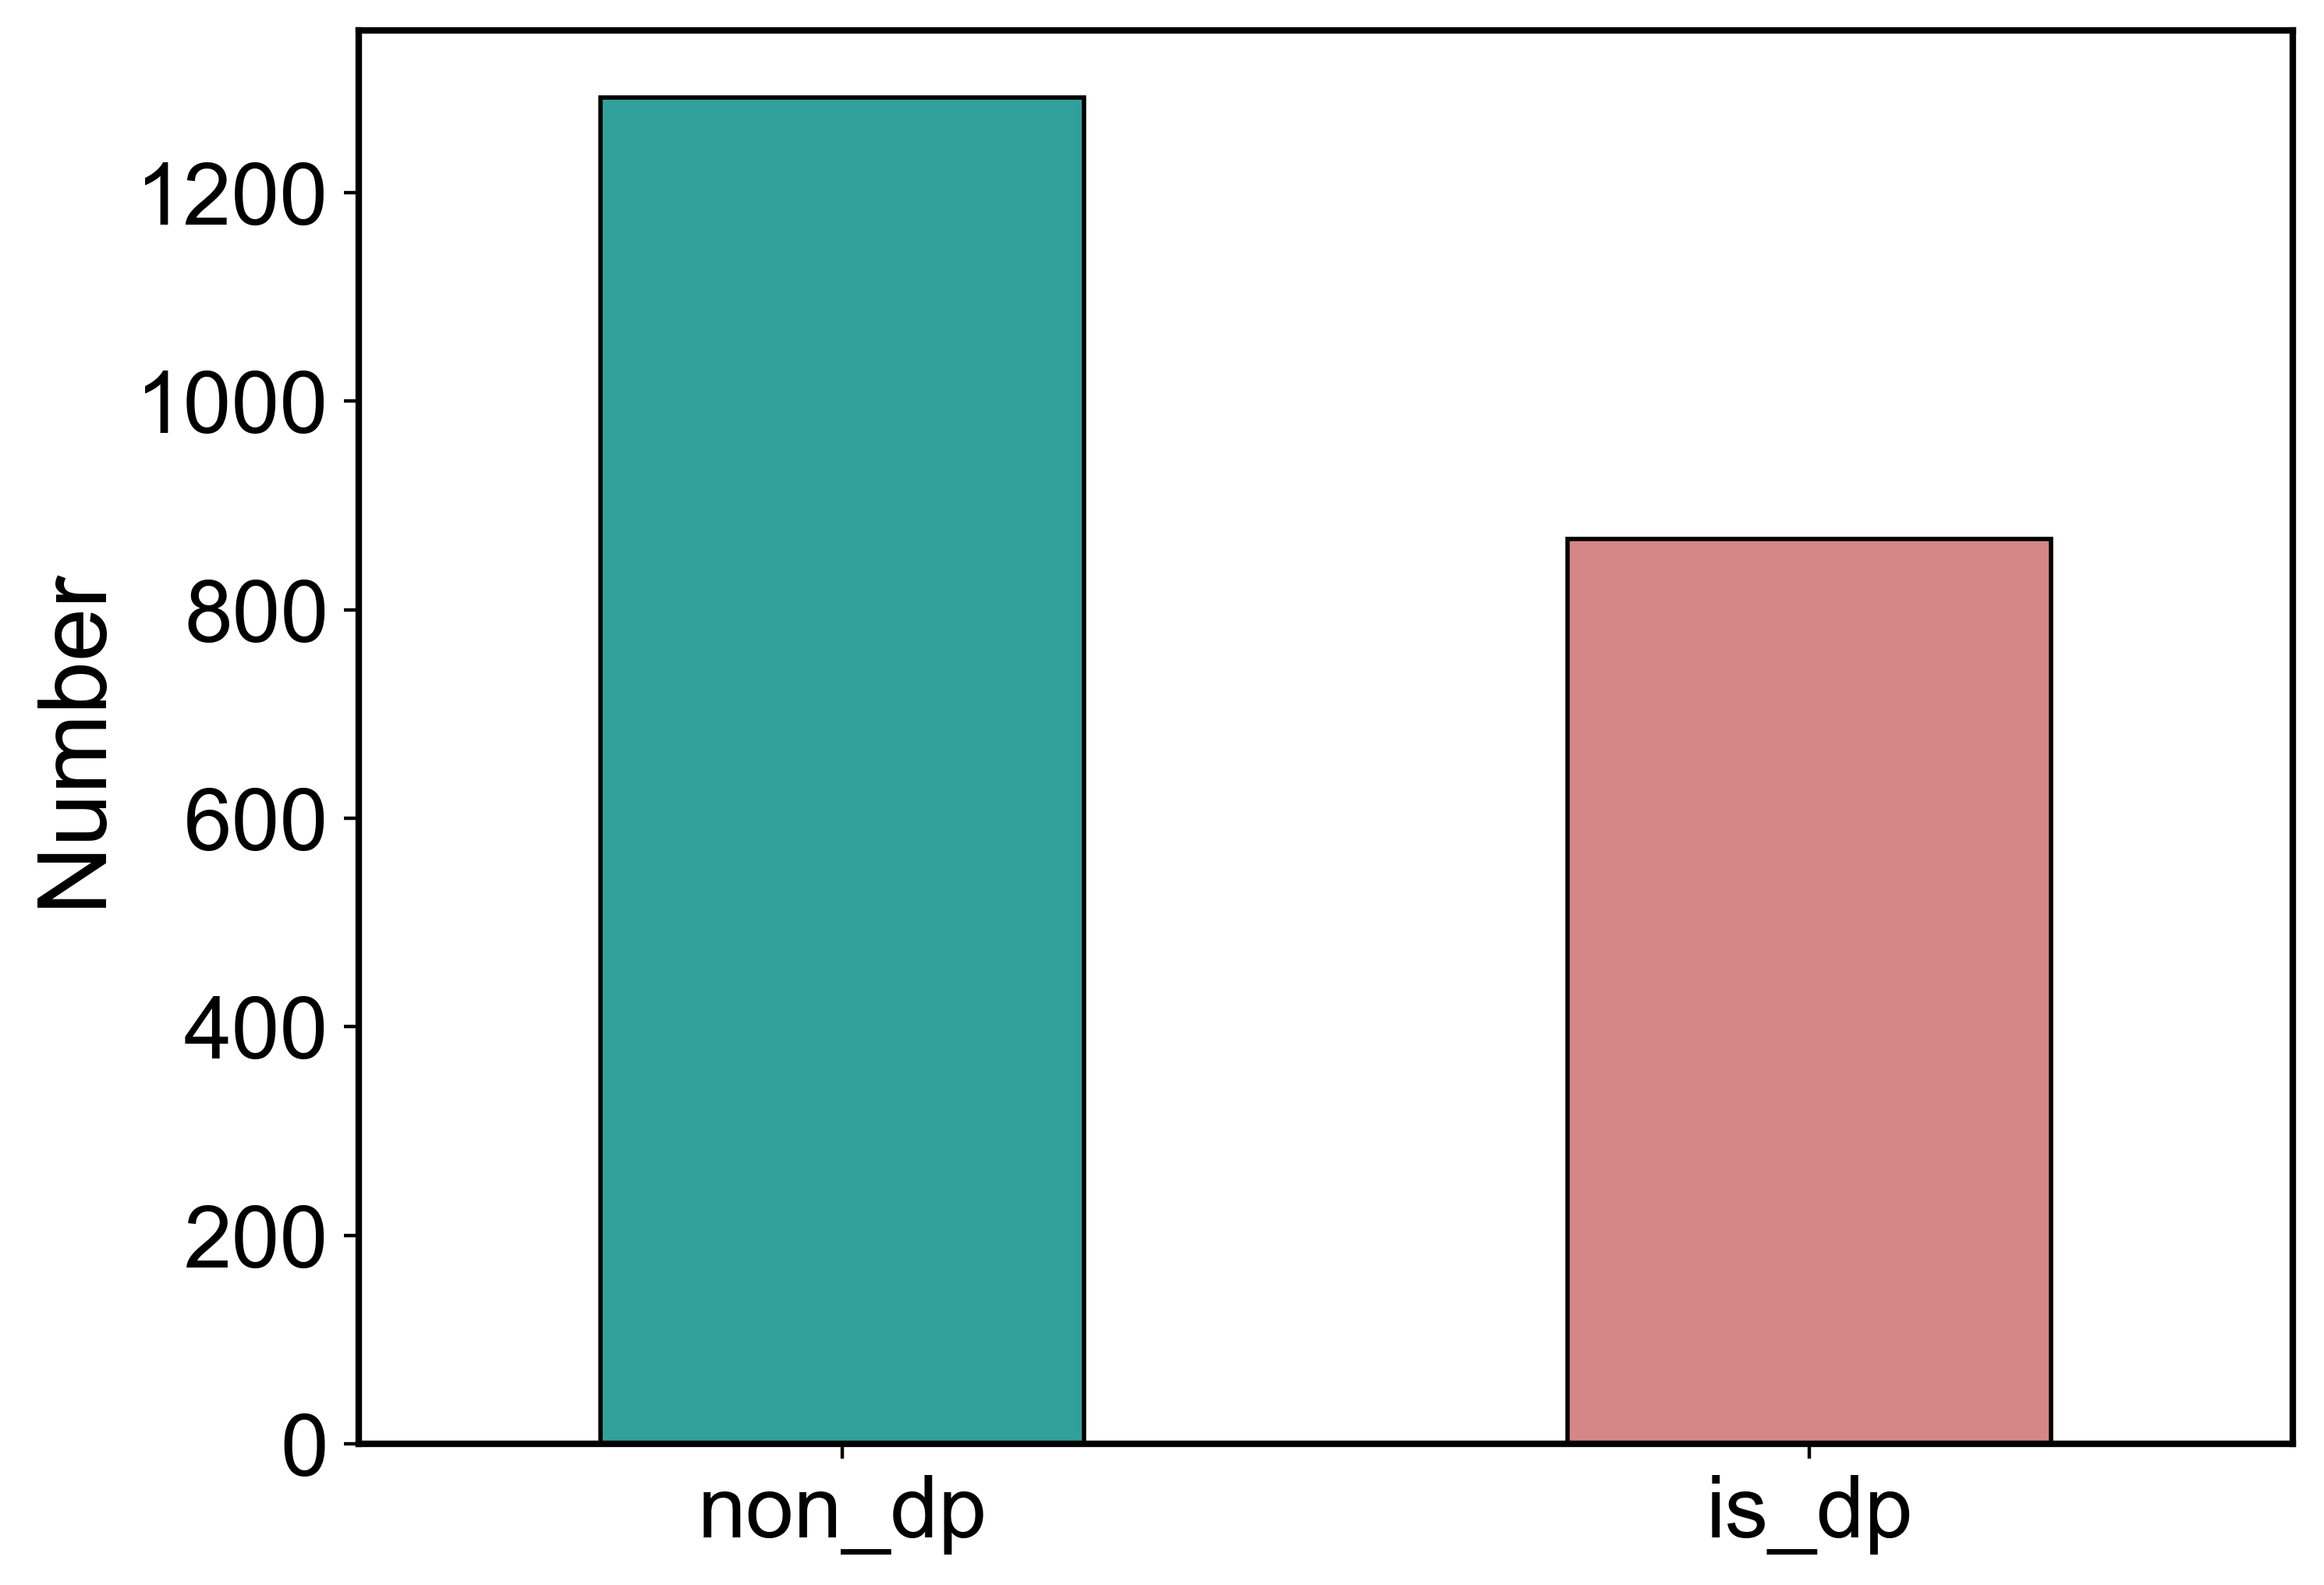

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

y_counts = data['is_double_perovskite'].value_counts()
y_counts.plot(kind='bar', color=['#31A09A', '#D58686'],edgecolor='black')
plt.ylabel('Number',fontsize=22)
plt.xticks(ticks=[0, 1], labels=['non_dp', 'is_dp'], rotation=0,fontsize=22)

ax = plt.gca()  
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=20)  # 让刻度数字更大
ax.set_xlabel('') 
plt.savefig('./picture/spacegroup_distribution.png', dpi=400, bbox_inches='tight')
plt.show()

In [23]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''  
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    return x

In [26]:
X = get_magpie_plus_features(data['formula_pretty'])
X = X.drop('Unnamed: 272',axis=1)
X = X.reset_index()
X = X.drop('index',axis=1)
X = X.fillna(0)
X.columns = X.columns.str.replace(' ', '_')

Successfully generated 2159 chemical formula features！


In [27]:
X = remove_collinear_features(X, 0.8)

In [28]:
y = data['is_double_perovskite']

In [52]:
feature_set = list(X.columns)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
def fold5_ensemble(model, X, y, name='', is_plot=True):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    models = []  
    accuracies = []
    f1s = []
    mccs = []
    roc_aucs = []
    recalls = []
    fig, ax = plt.subplots()
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        try:
            X = X.values
            y = y.values
        except:
            pass
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
      
        model.fit(X_train_balanced, y_train_balanced)
        models.append(model)
    
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        # Calculate performance metrics
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        mcc = metrics.matthews_corrcoef(y_test, y_pred)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
        roc_auc = metrics.auc(fpr, tpr)
        recall = metrics.recall_score(y_test, y_pred)
       
        print(f"Fold {i+ 1} Accuracy: {accuracy} F1_Score: {f1}  ROC_AUC: {roc_auc}")
        
        accuracies.append(accuracy)
        f1s.append(f1)
        mccs.append(mcc)
        roc_aucs.append(roc_auc)
        recalls.append(recall)
    
        if is_plot:
            ax.plot(fpr, tpr, label=f"Fold {i+1} (AUC = {roc_auc:.3f})", lw=1.7, linestyle="-.", alpha=0.75)
            ax.plot([0, 1], [0, 1], "r--", lw=1, alpha=0.8)
            ax.set_xlim([-0.02, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel("False Positive Rate", fontsize=22)
            ax.set_ylabel("True Positive Rate", fontsize=22)
           # ax.set_title(f"ROC Curves: {name}", fontweight="bold")
            ax.legend(loc="lower right" ,fontsize=17)
            ax.grid(True, linestyle="--", linewidth=1, alpha=0.5)
            ax.spines["top"].set_linewidth(1.5)
            ax.spines["bottom"].set_linewidth(1.5)
            ax.spines["left"].set_linewidth(1.5)
            ax.spines["right"].set_linewidth(1.5)
            ax.tick_params(axis='both', which='major', labelsize=20)
            ax.grid(False)

    result = {
        'accuracy': np.mean(accuracies),
        'f1-score': np.mean(f1s),
        'mcc': np.mean(mccs),
        'roc_auc': np.mean(roc_aucs),
        'recall': np.mean(recalls)        }
    if is_plot:
        #plt.savefig('./picture/sp_class_smote.png', dpi=400, bbox_inches='tight')
        plt.show()
    return result, models

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
seed =42
kn = KNeighborsClassifier()
svm = SVC(random_state=seed,probability=True)
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(n_jobs=-1,random_state=seed)
mlp = MLPClassifier(alpha=1, max_iter=1000,random_state=seed)
lgbm = LGBMClassifier(random_state=seed,verbose=0)
xb = XGBClassifier(random_state=seed,n_jobs=-1)
ext = ExtraTreesClassifier(n_jobs=-1,random_state=seed) 
gbc = GradientBoostingClassifier(random_state=seed)
gnb = GaussianNB()

Fold 1 Accuracy: 0.9722222222222222 F1_Score: 0.9762845849802371  ROC_AUC: 0.9942084942084942
Fold 2 Accuracy: 0.9791666666666666 F1_Score: 0.9822485207100593  ROC_AUC: 0.9903100775193798
Fold 3 Accuracy: 0.9814814814814815 F1_Score: 0.9842519685039369  ROC_AUC: 0.9913570346609641
Fold 4 Accuracy: 0.9791666666666666 F1_Score: 0.9822485207100593  ROC_AUC: 0.9934509489441327
Fold 5 Accuracy: 0.9837587006960556 F1_Score: 0.9862475442043221  ROC_AUC: 0.9996639333243715


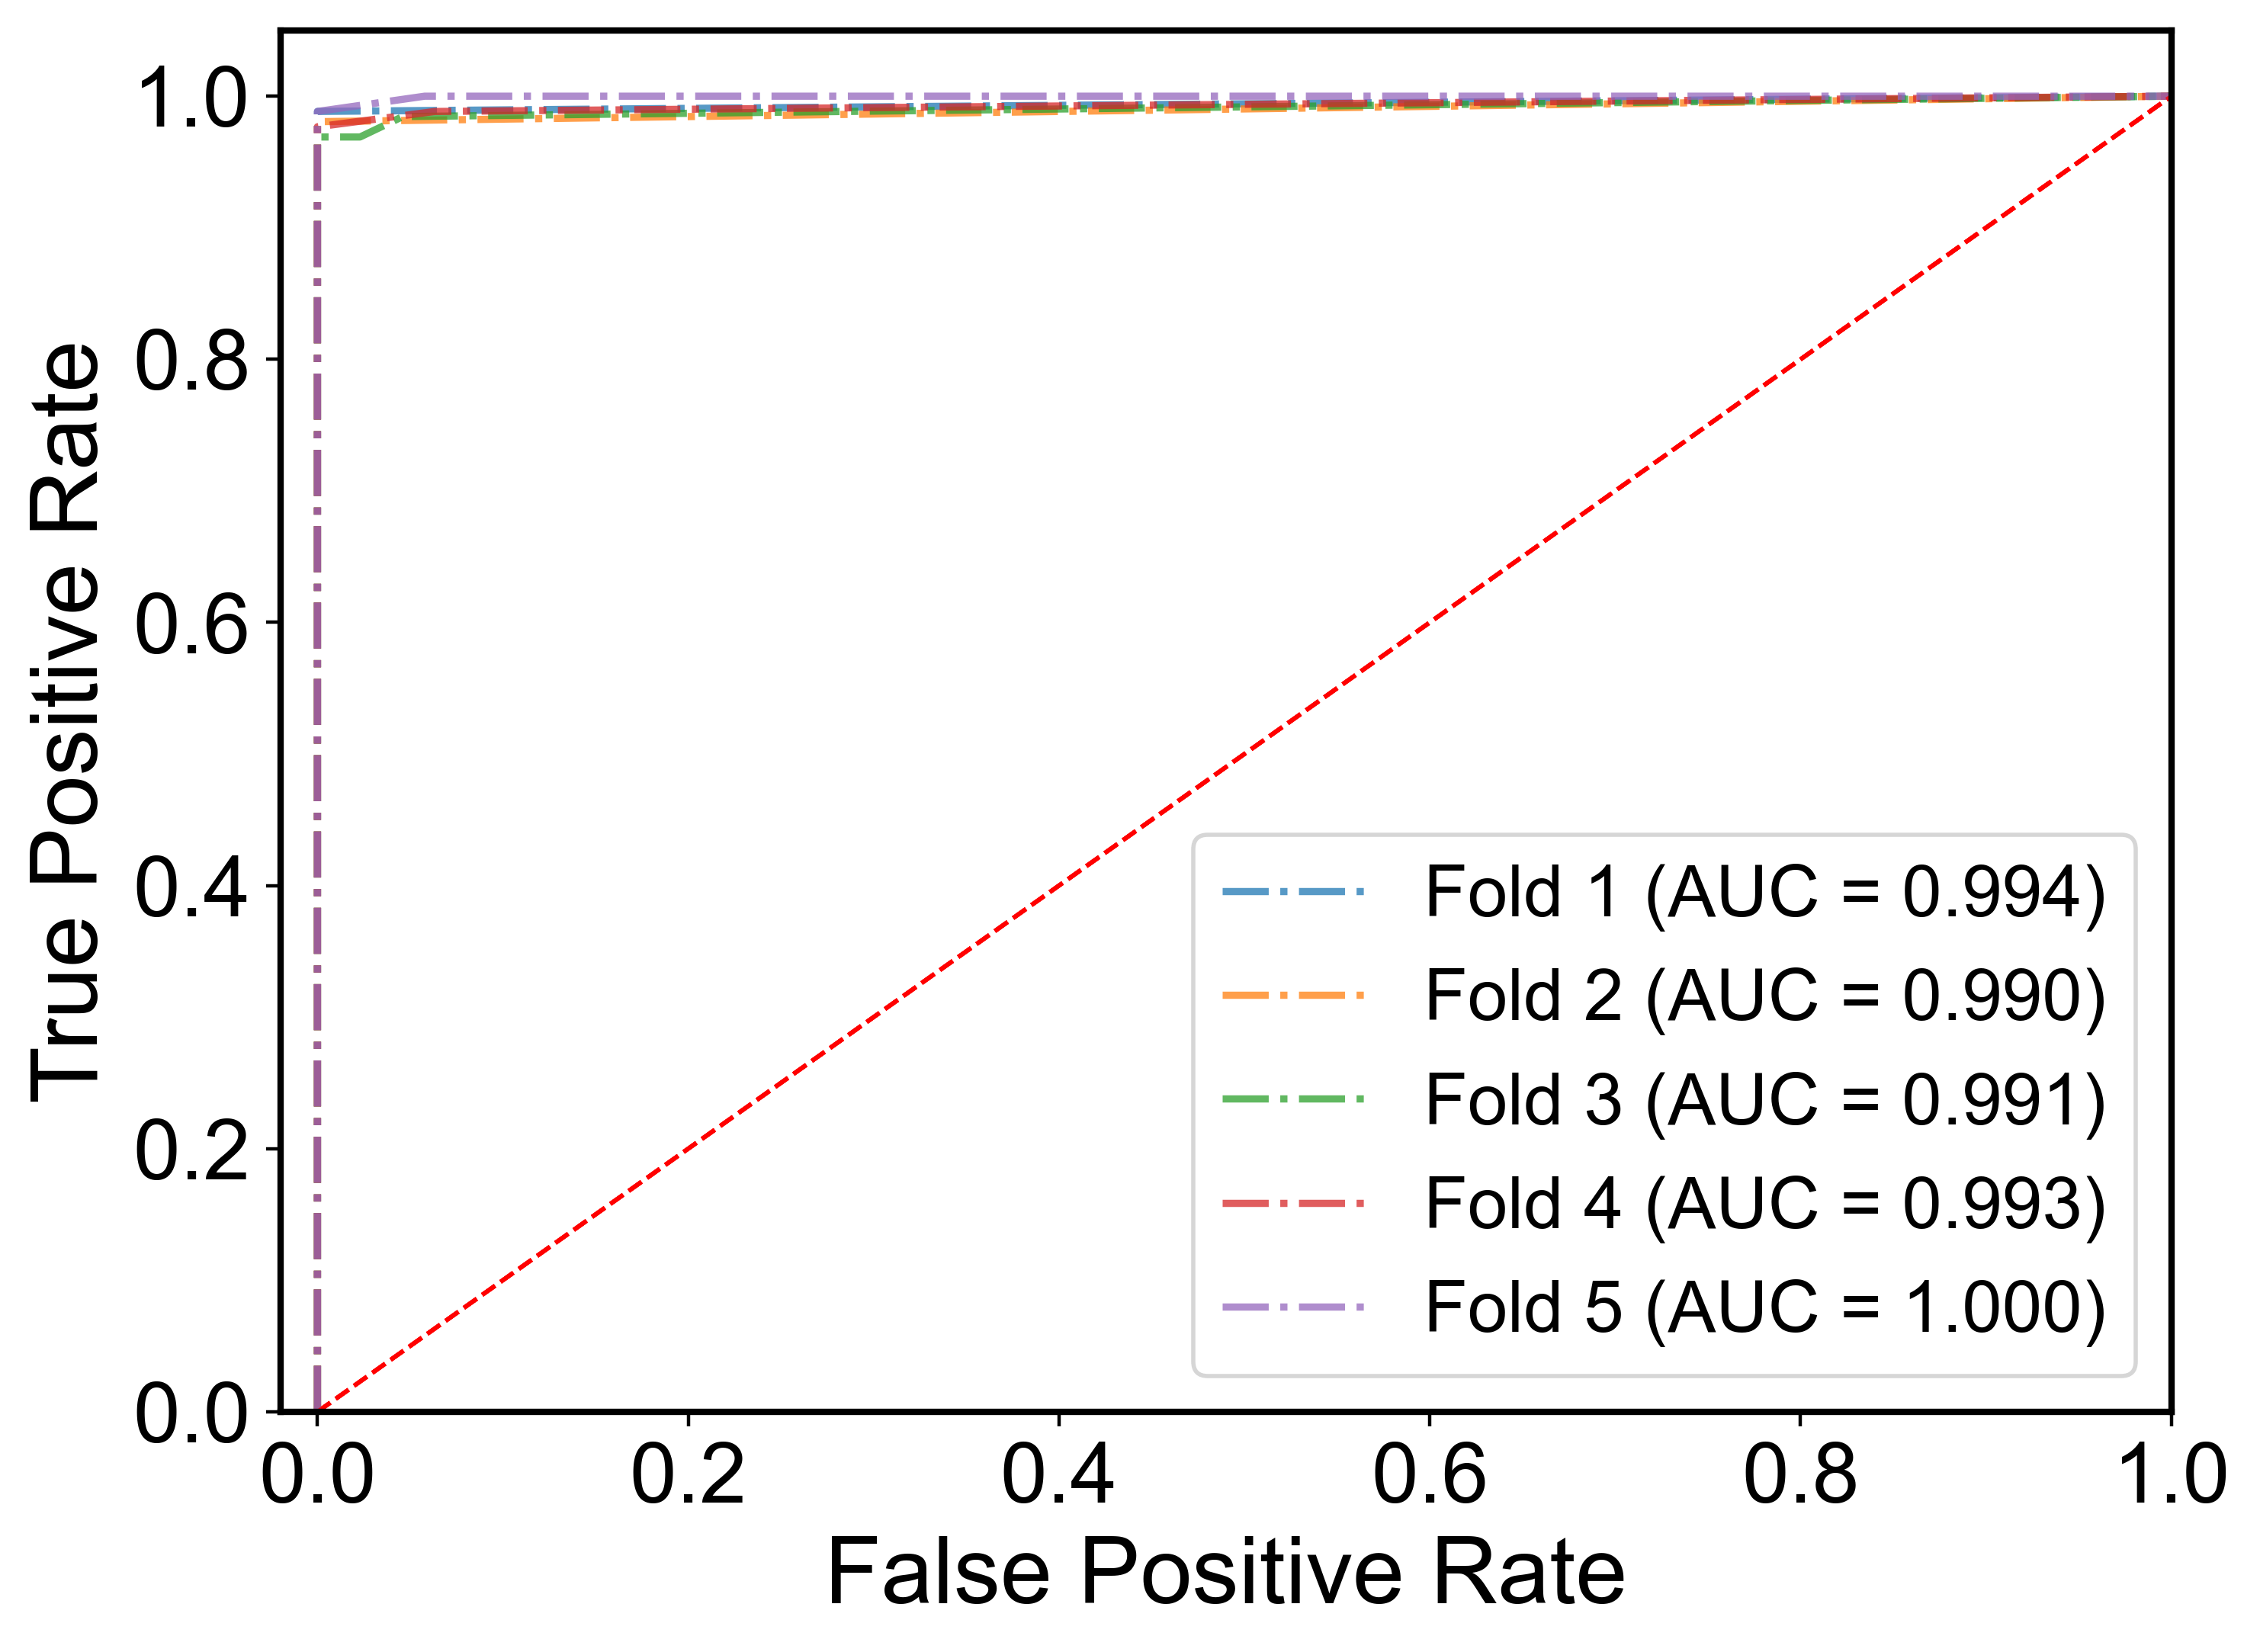

({'accuracy': 0.9791591475466184,
  'f1-score': 0.9822562278217231,
  'mcc': 0.9579413633205954,
  'roc_auc': 0.9937980977314684,
  'recall': 0.9651521953847535},
 [KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier()])

In [34]:
fold5_ensemble(kn, X, y)

Fold 1 Accuracy: 0.8958333333333334 F1_Score: 0.9171270718232044  ROC_AUC: 0.9405673220702122
Fold 2 Accuracy: 0.8796296296296297 F1_Score: 0.9047619047619048  ROC_AUC: 0.9225028958389023
Fold 3 Accuracy: 0.8912037037037037 F1_Score: 0.9140767824497259  ROC_AUC: 0.9139490332353203
Fold 4 Accuracy: 0.8449074074074074 F1_Score: 0.8784029038112523  ROC_AUC: 0.8771496034928272
Fold 5 Accuracy: 0.8259860788863109 F1_Score: 0.8672566371681416  ROC_AUC: 0.8856701169512031


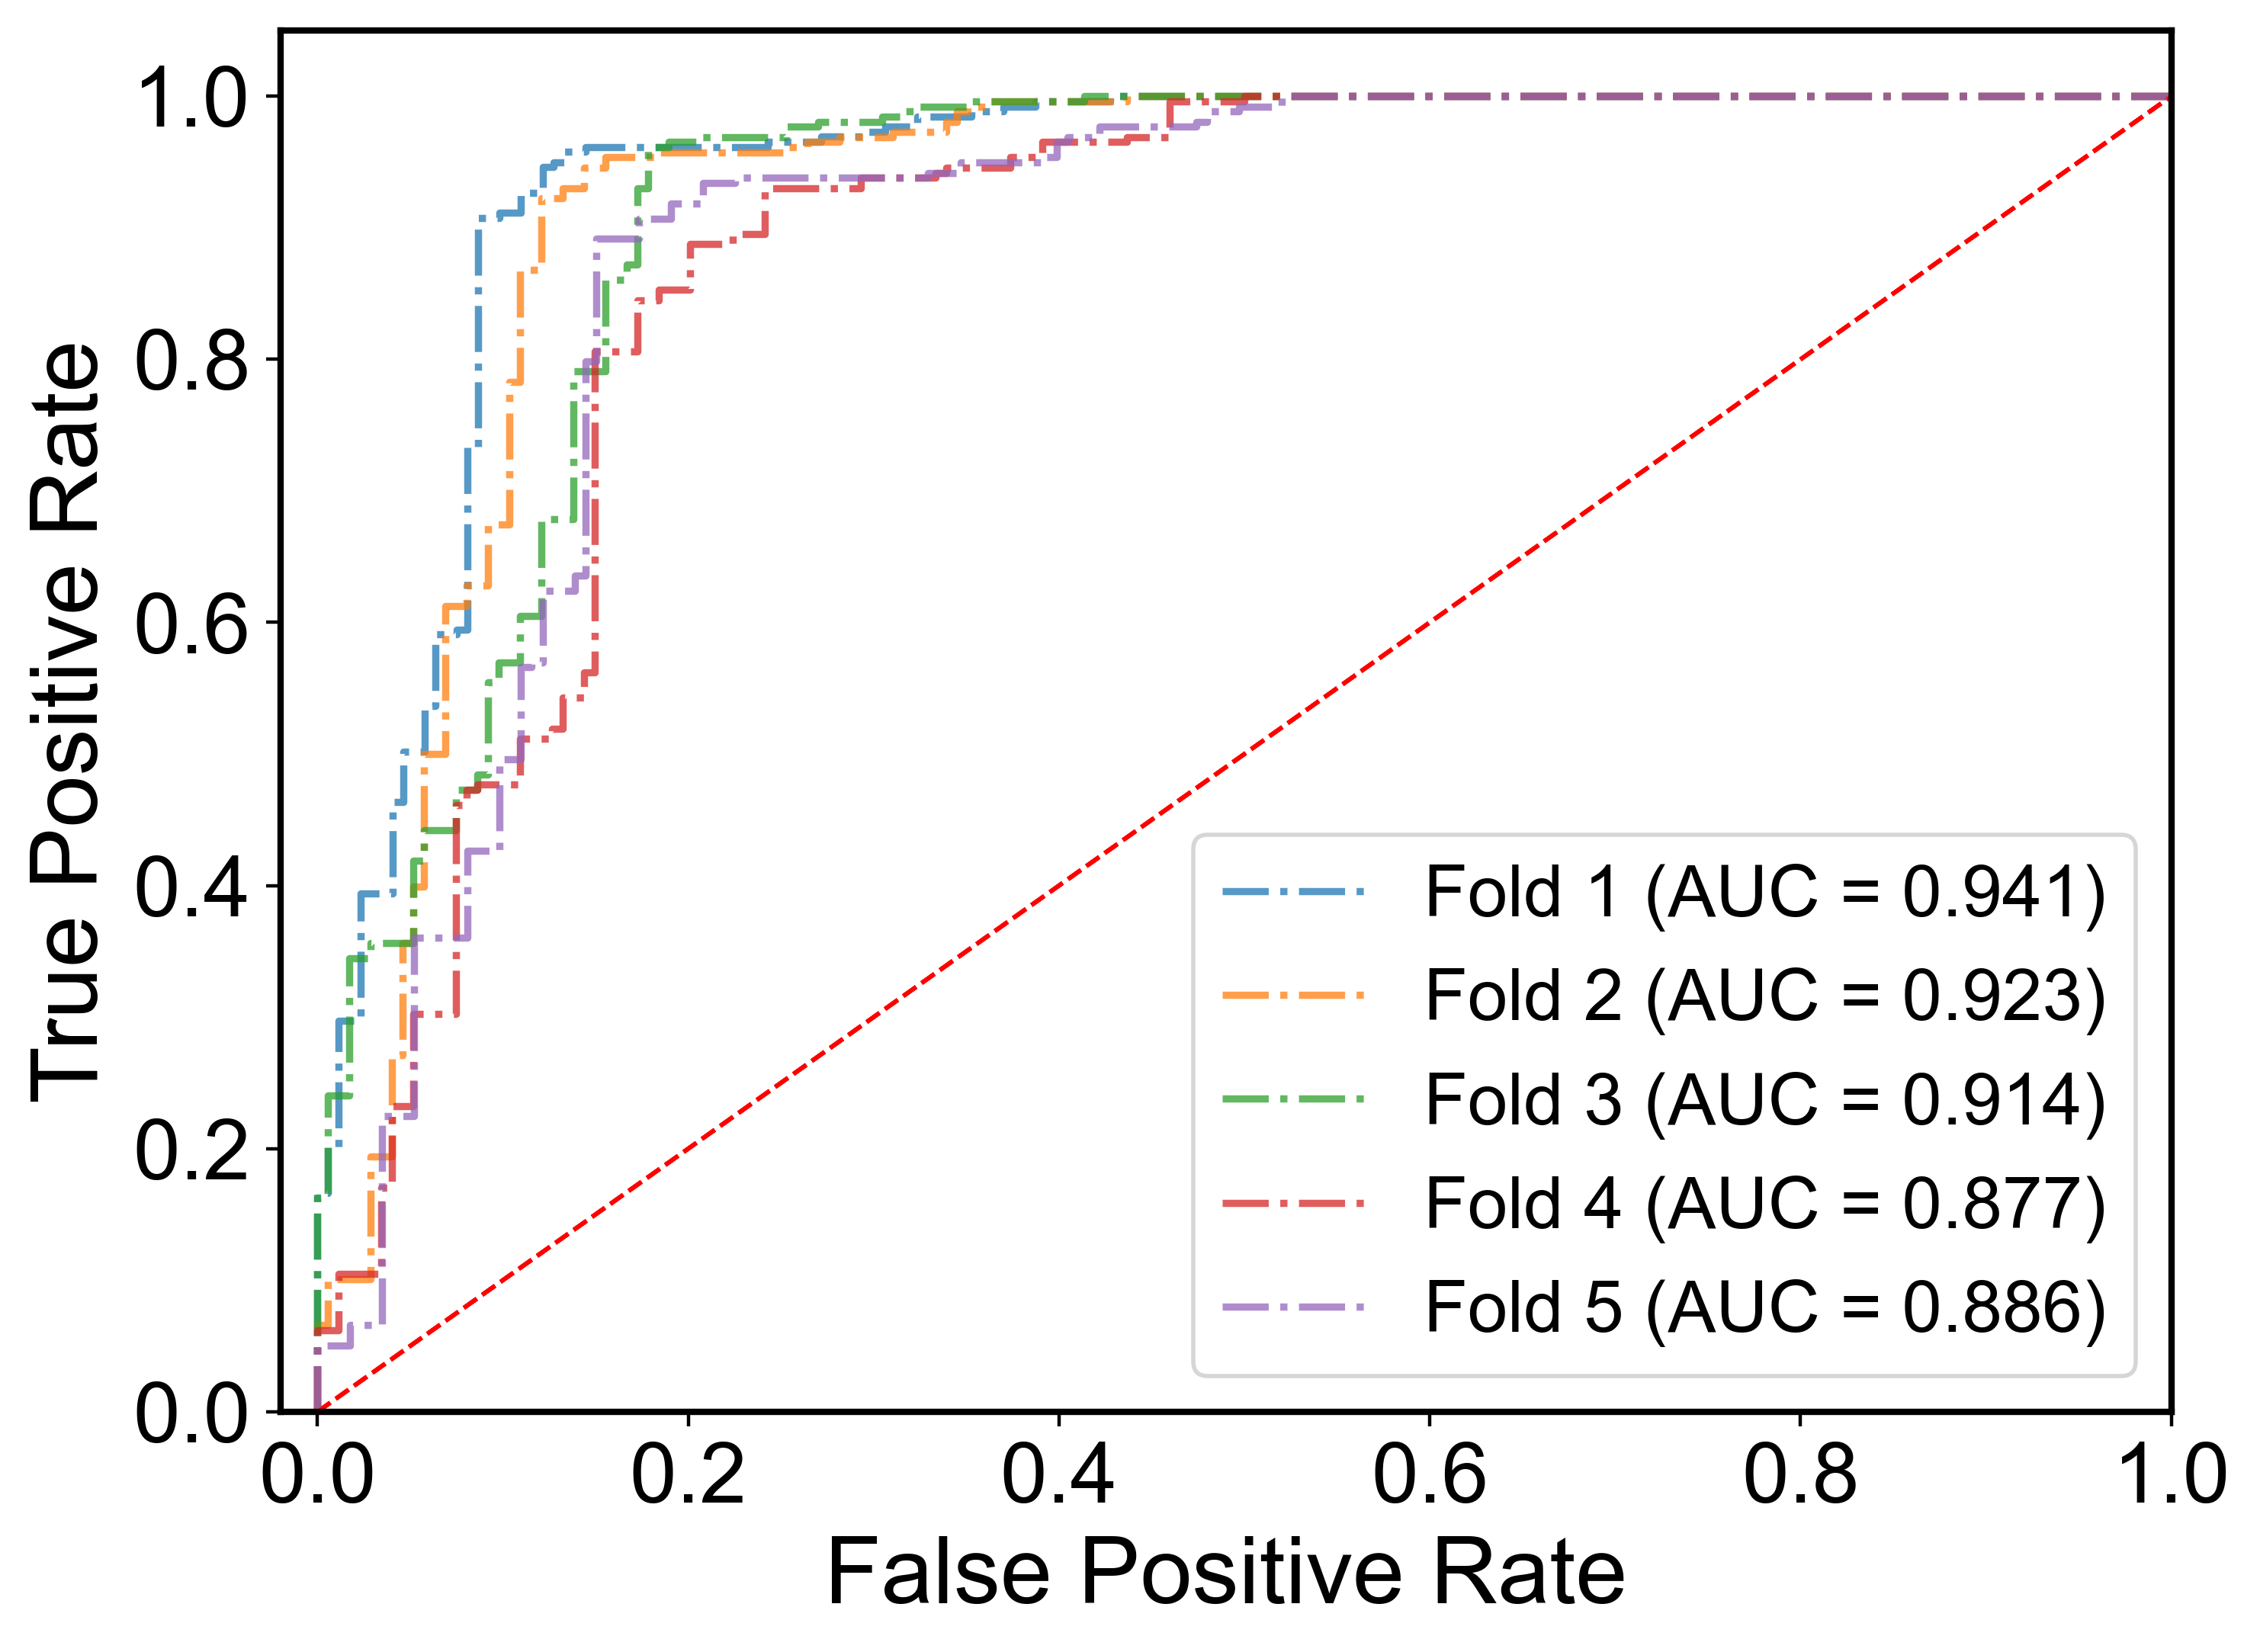

({'accuracy': 0.8675120305920772,
  'f1-score': 0.896325060002846,
  'mcc': 0.7256396286111895,
  'roc_auc': 0.9079677943176929,
  'recall': 0.9550686899524109},
 [SVC(probability=True, random_state=42),
  SVC(probability=True, random_state=42),
  SVC(probability=True, random_state=42),
  SVC(probability=True, random_state=42),
  SVC(probability=True, random_state=42)])

In [37]:
fold5_ensemble(svm, X, y)

Fold 1 Accuracy: 0.9907407407407407 F1_Score: 0.9922178988326849  ROC_AUC: 0.9922779922779923
Fold 2 Accuracy: 0.9930555555555556 F1_Score: 0.9941520467836257  ROC_AUC: 0.9941860465116279
Fold 3 Accuracy: 0.9953703703703703 F1_Score: 0.9961089494163424  ROC_AUC: 0.9961240310077519
Fold 4 Accuracy: 0.9976851851851852 F1_Score: 0.9980582524271845  ROC_AUC: 0.998062015503876
Fold 5 Accuracy: 0.9953596287703016 F1_Score: 0.9961089494163424  ROC_AUC: 0.9961240310077519


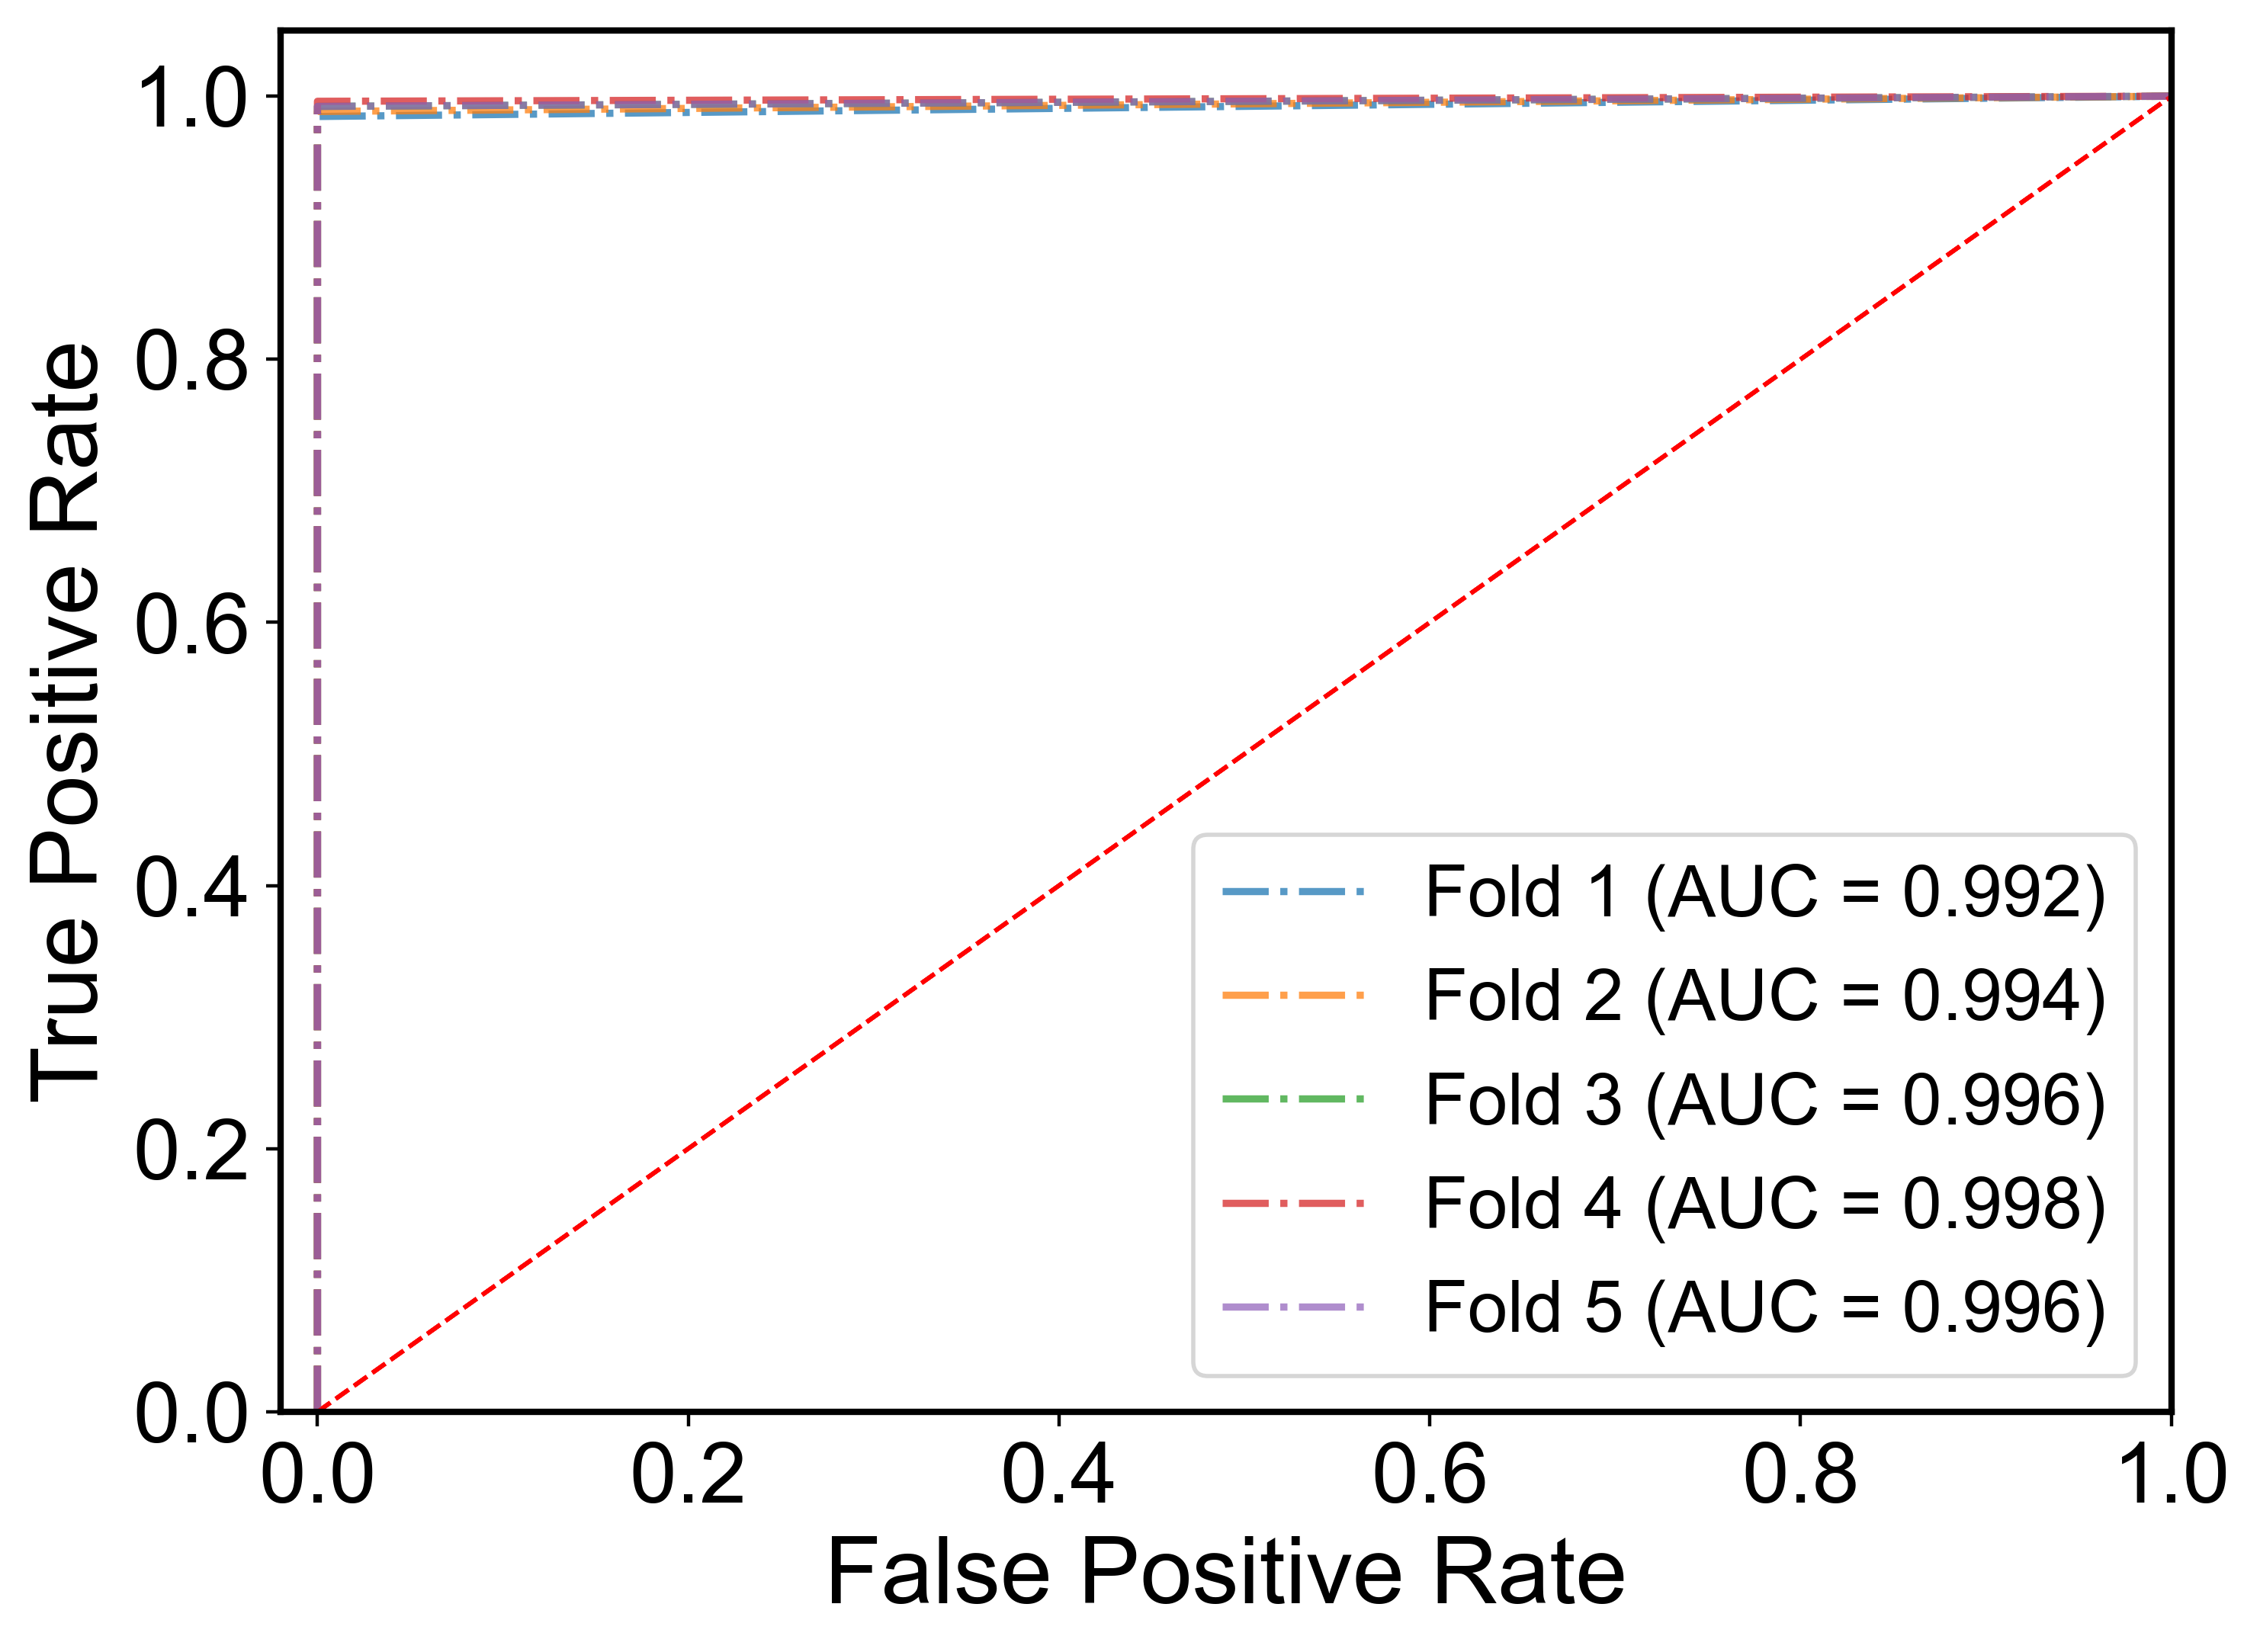

({'accuracy': 0.9944422961244307,
  'f1-score': 0.9953292193752359,
  'mcc': 0.9885465935165424,
  'roc_auc': 0.9953548232618001,
  'recall': 0.9907096465236},
 [DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42),
  DecisionTreeClassifier(random_state=42)])

In [38]:
fold5_ensemble(dt, X, y)

Fold 1 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 1.0
Fold 2 Accuracy: 0.9953703703703703 F1_Score: 0.9961089494163424  ROC_AUC: 1.0
Fold 3 Accuracy: 0.9976851851851852 F1_Score: 0.9980582524271845  ROC_AUC: 1.0
Fold 4 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 1.0
Fold 5 Accuracy: 0.9976798143851509 F1_Score: 0.9980582524271845  ROC_AUC: 1.0


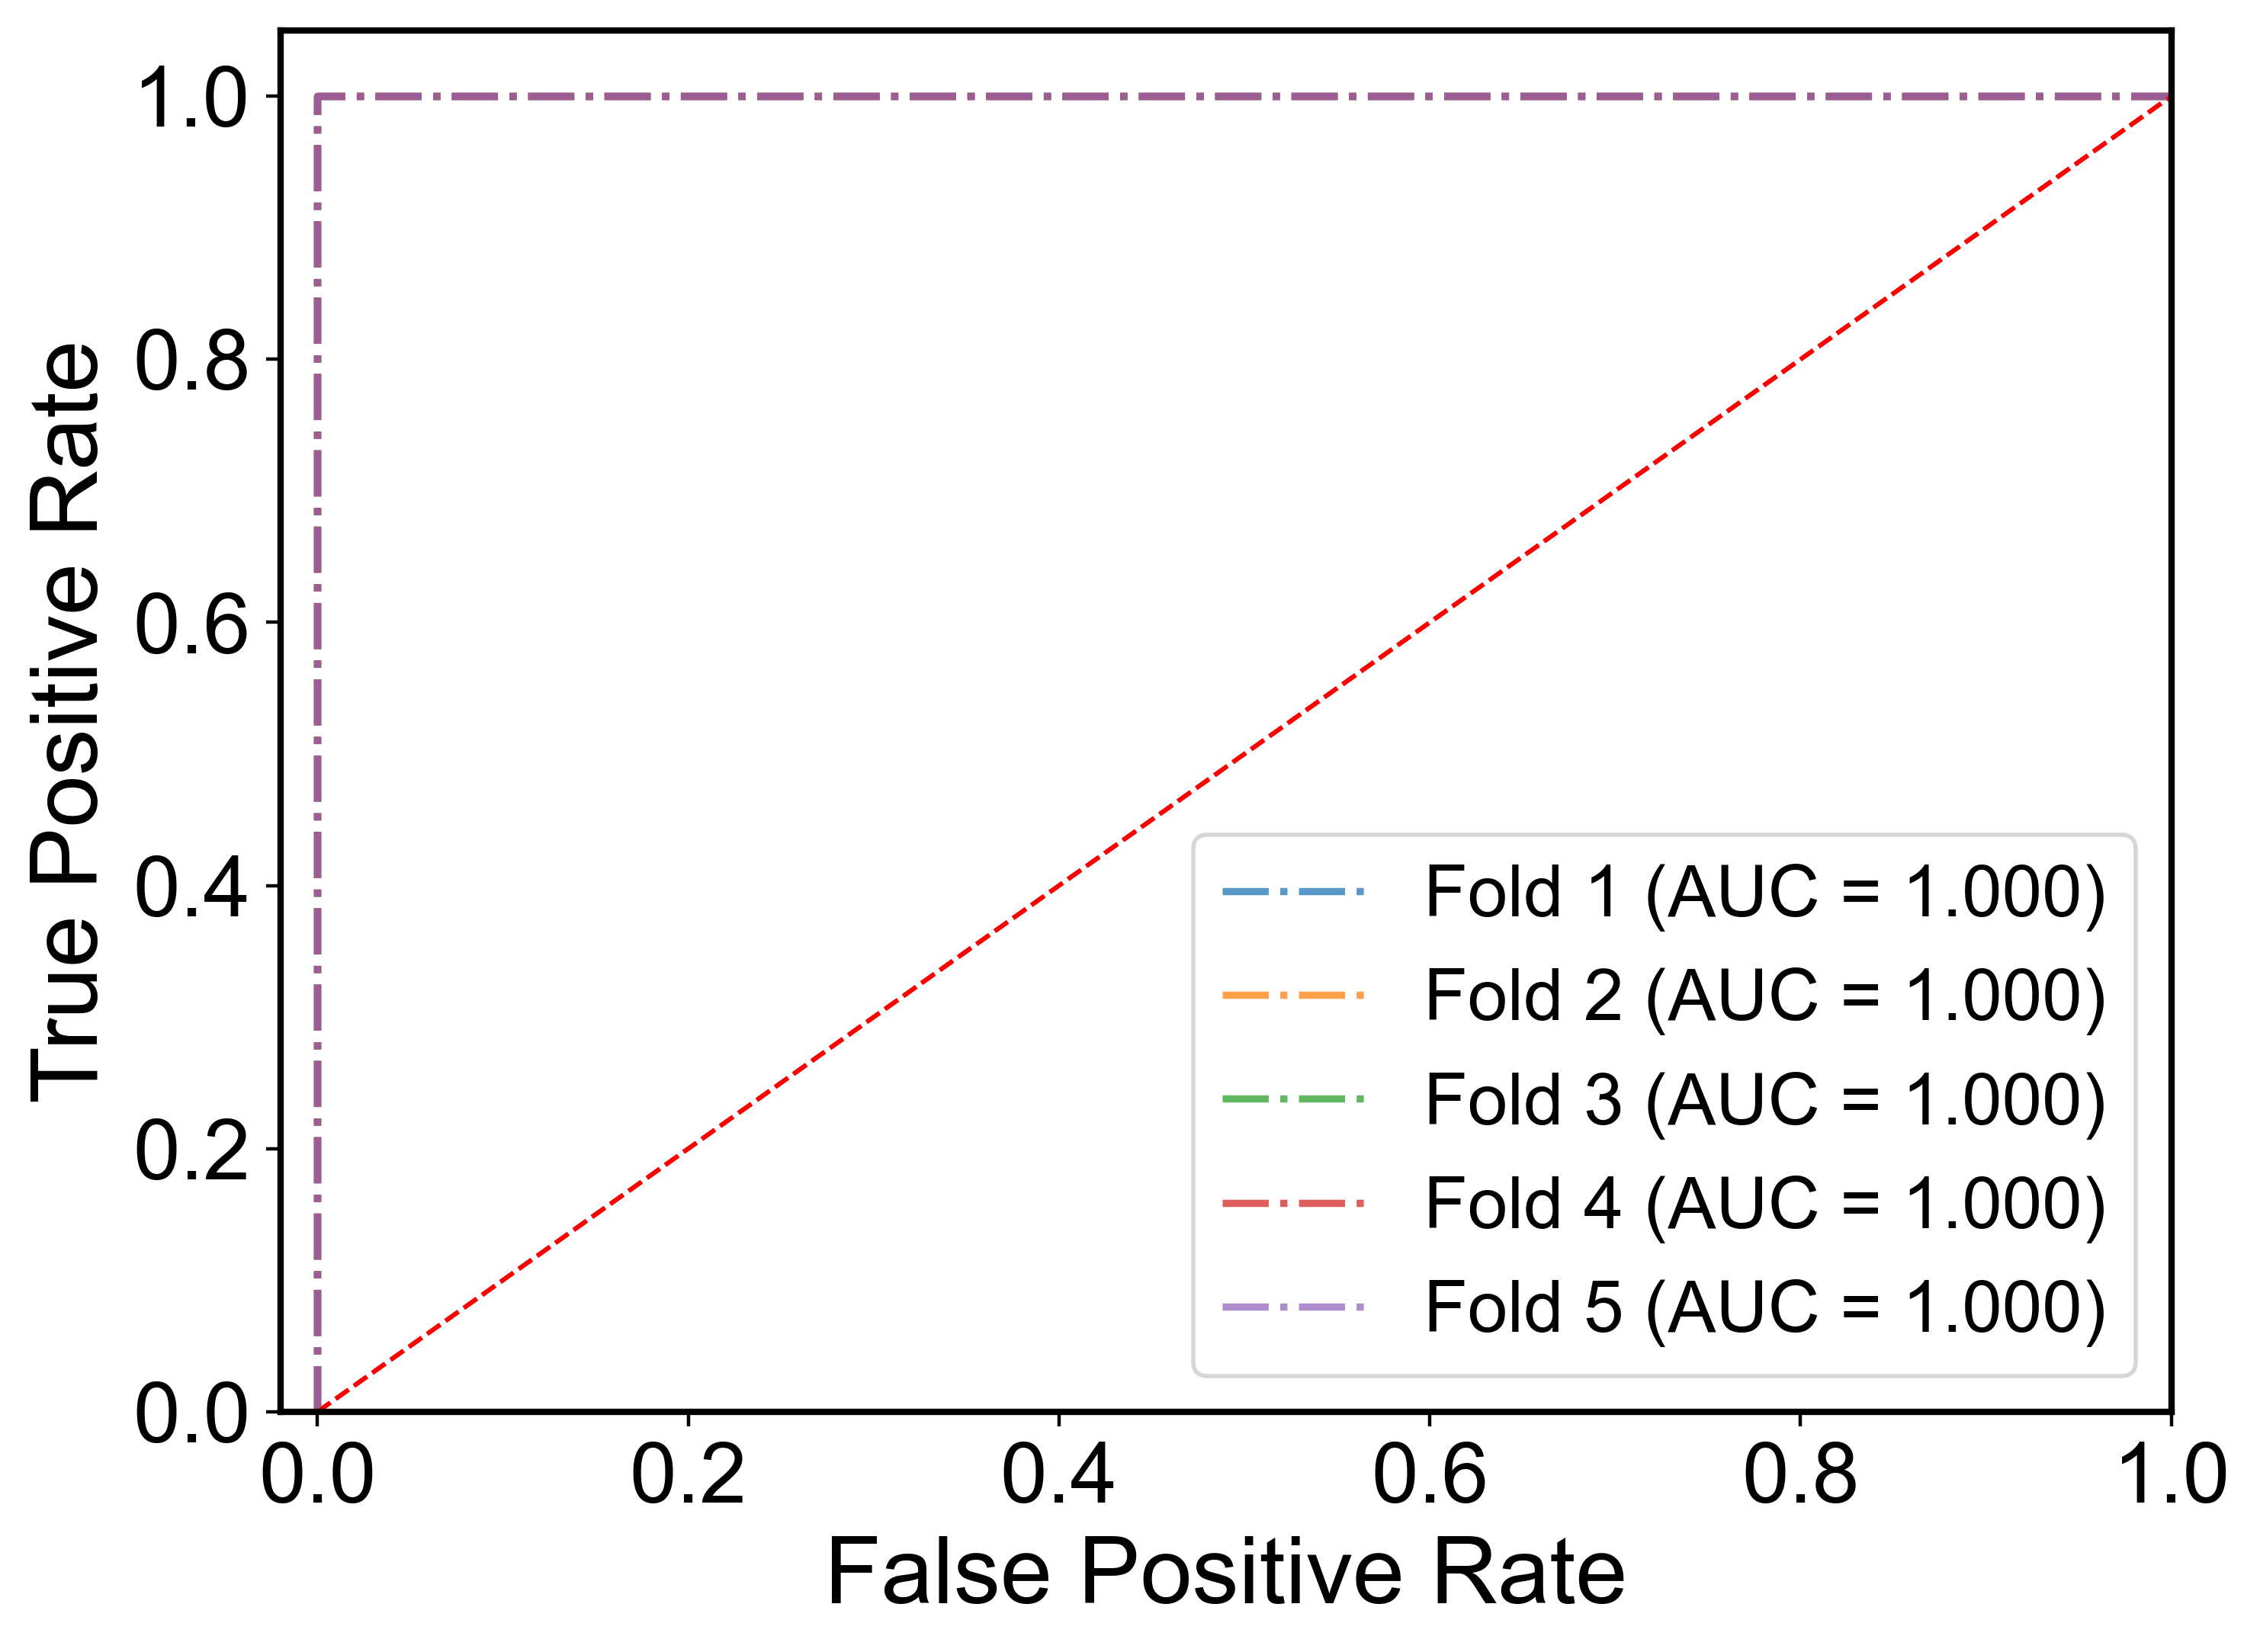

({'accuracy': 0.9981470739881413,
  'f1-score': 0.9984450908541422,
  'mcc': 0.9961666054490024,
  'roc_auc': 1.0,
  'recall': 0.9968992248062015},
 [RandomForestClassifier(n_jobs=-1, random_state=42),
  RandomForestClassifier(n_jobs=-1, random_state=42),
  RandomForestClassifier(n_jobs=-1, random_state=42),
  RandomForestClassifier(n_jobs=-1, random_state=42),
  RandomForestClassifier(n_jobs=-1, random_state=42)])

In [39]:
fold5_ensemble(rf, X, y)

Fold 1 Accuracy: 0.9467592592592593 F1_Score: 0.9535353535353535  ROC_AUC: 0.9995313232307452
Fold 2 Accuracy: 0.9837962962962963 F1_Score: 0.9863013698630136  ROC_AUC: 0.9987080103359173
Fold 3 Accuracy: 0.9884259259259259 F1_Score: 0.9904030710172744  ROC_AUC: 0.9997549674775016
Fold 4 Accuracy: 0.9074074074074074 F1_Score: 0.9280575539568345  ROC_AUC: 0.9971932638331998
Fold 5 Accuracy: 0.9837587006960556 F1_Score: 0.9866156787762906  ROC_AUC: 0.9996863377694134


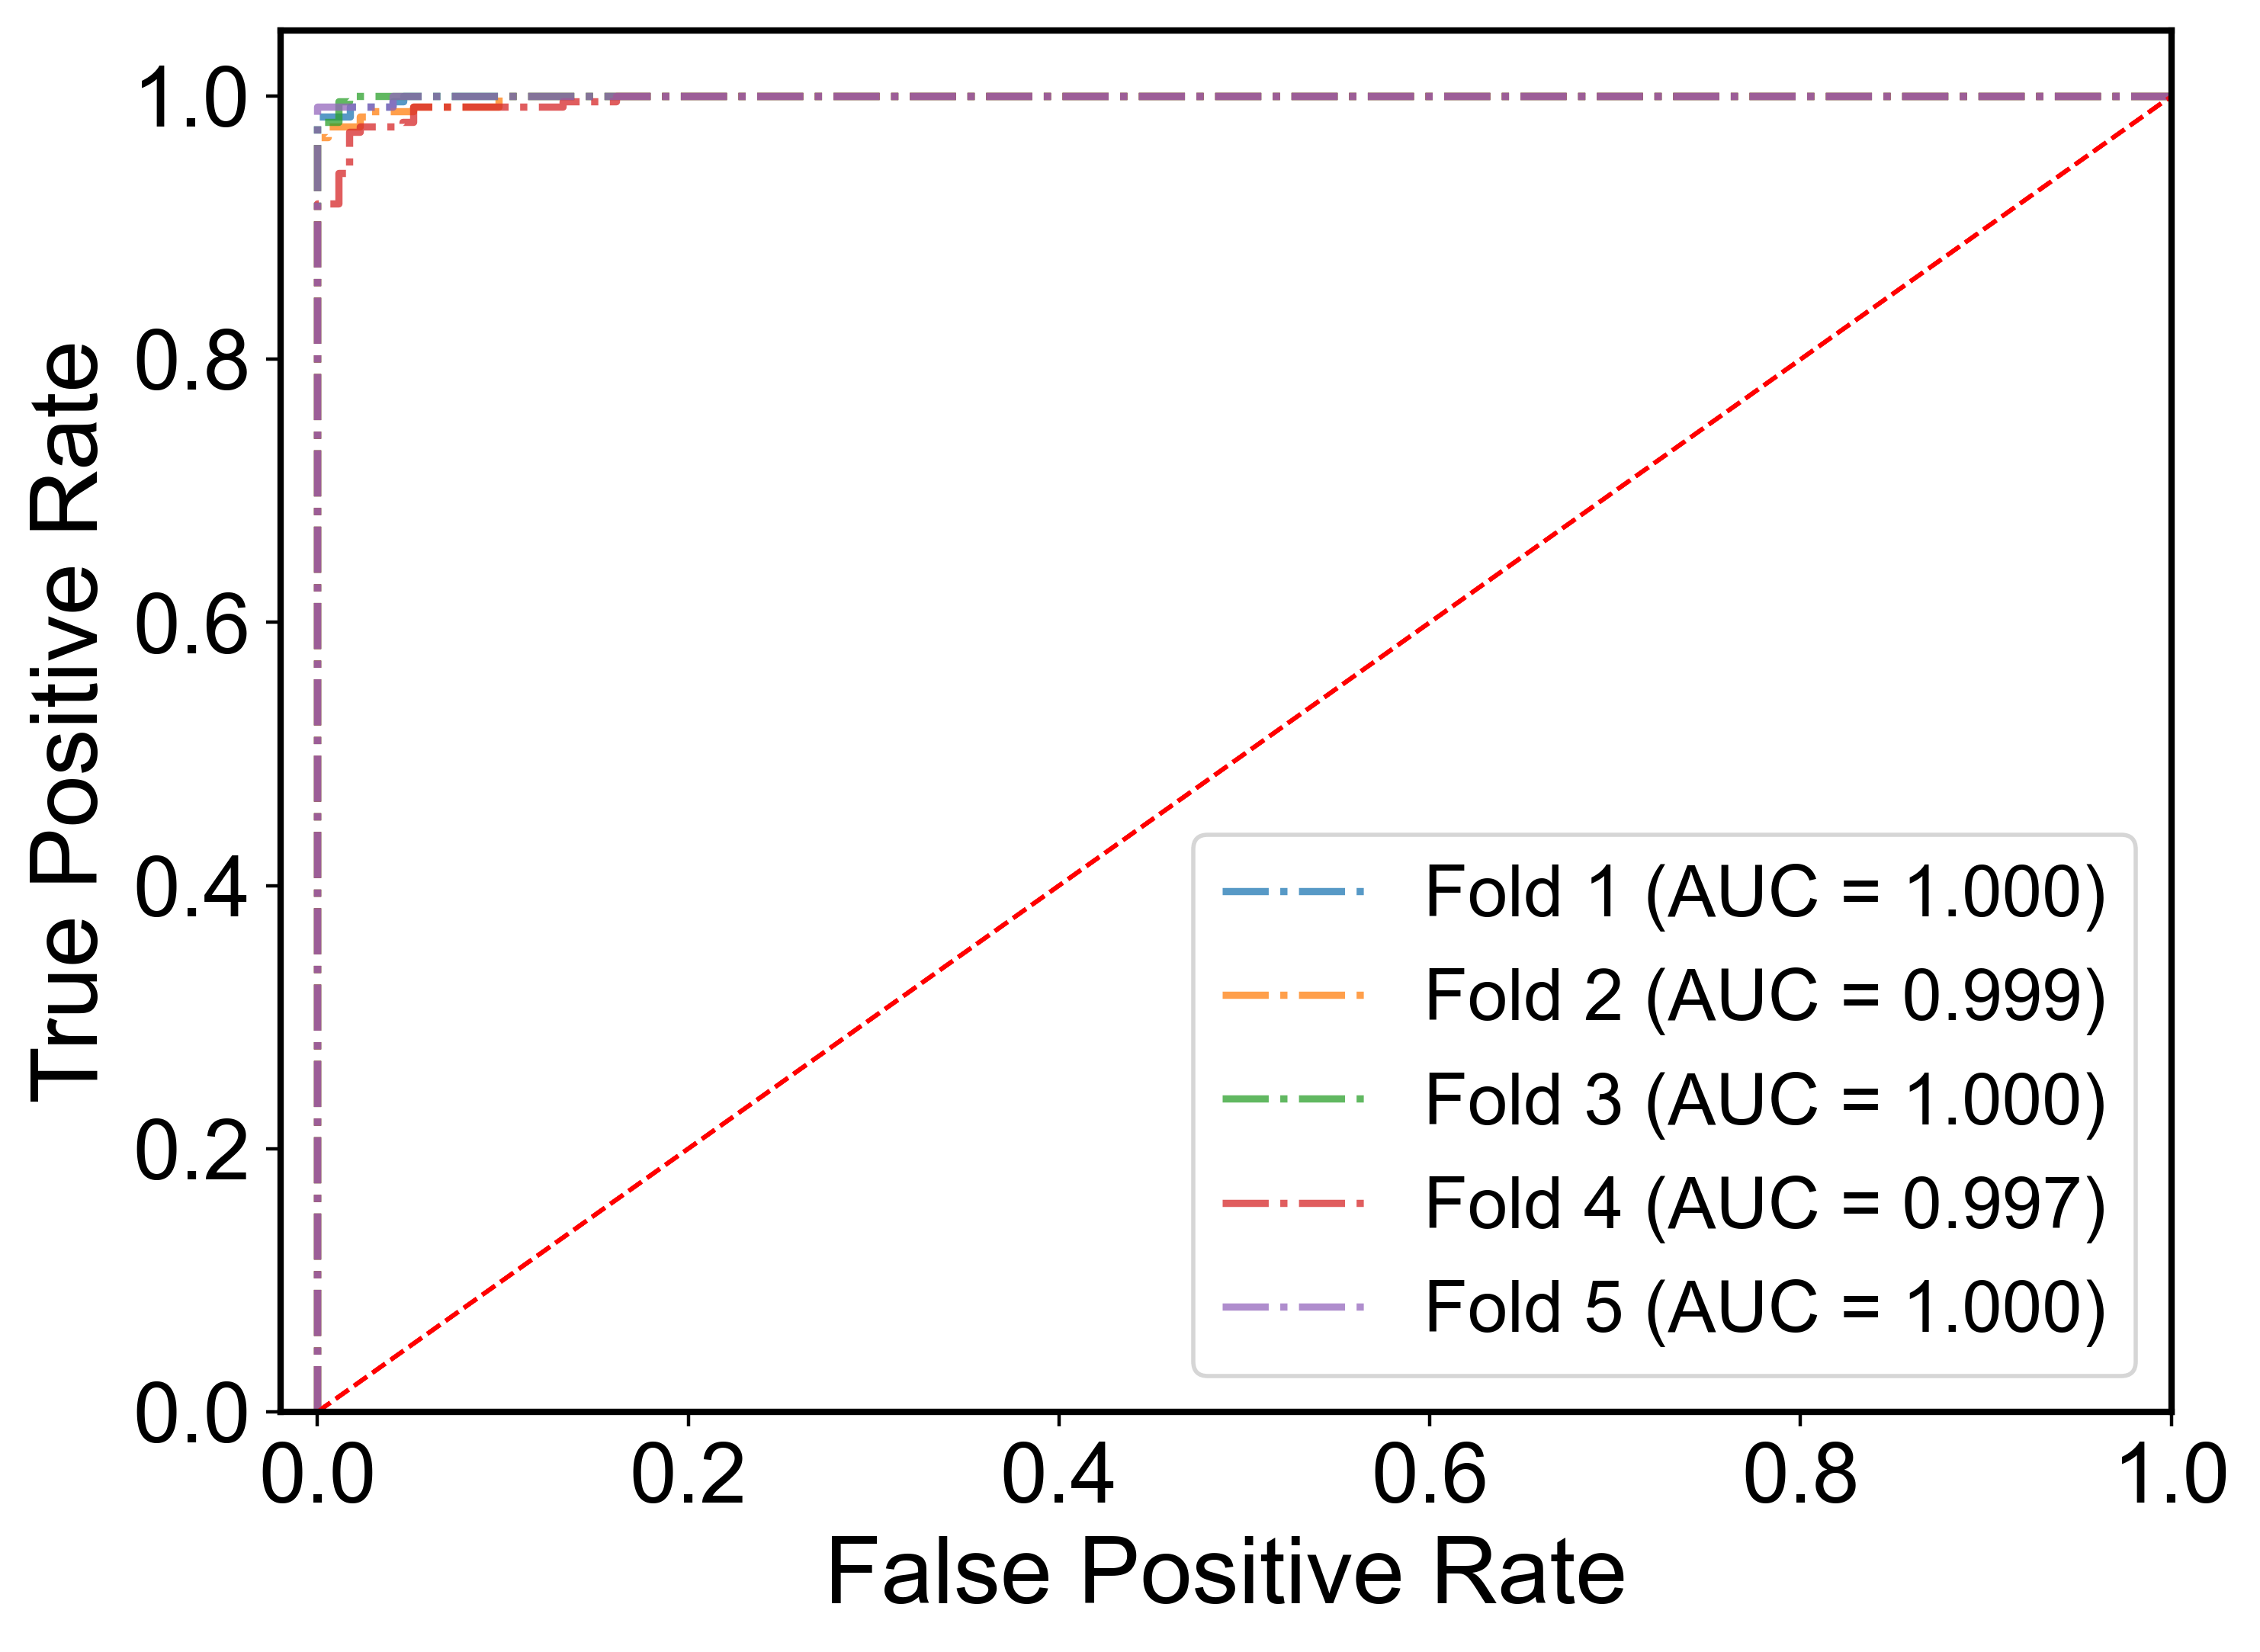

({'accuracy': 0.9620295179169889,
  'f1-score': 0.9689826054297533,
  'mcc': 0.9245517071682668,
  'roc_auc': 0.9989747805293554,
  'recall': 0.9775882194486846},
 [MLPClassifier(alpha=1, max_iter=1000, random_state=42),
  MLPClassifier(alpha=1, max_iter=1000, random_state=42),
  MLPClassifier(alpha=1, max_iter=1000, random_state=42),
  MLPClassifier(alpha=1, max_iter=1000, random_state=42),
  MLPClassifier(alpha=1, max_iter=1000, random_state=42)])

In [40]:
fold5_ensemble(mlp, X, y)

Fold 1 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 0.9999999999999999
Fold 2 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 1.0
Fold 3 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 1.0
Fold 4 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 0.9999999999999999
Fold 5 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 0.9999999999999999


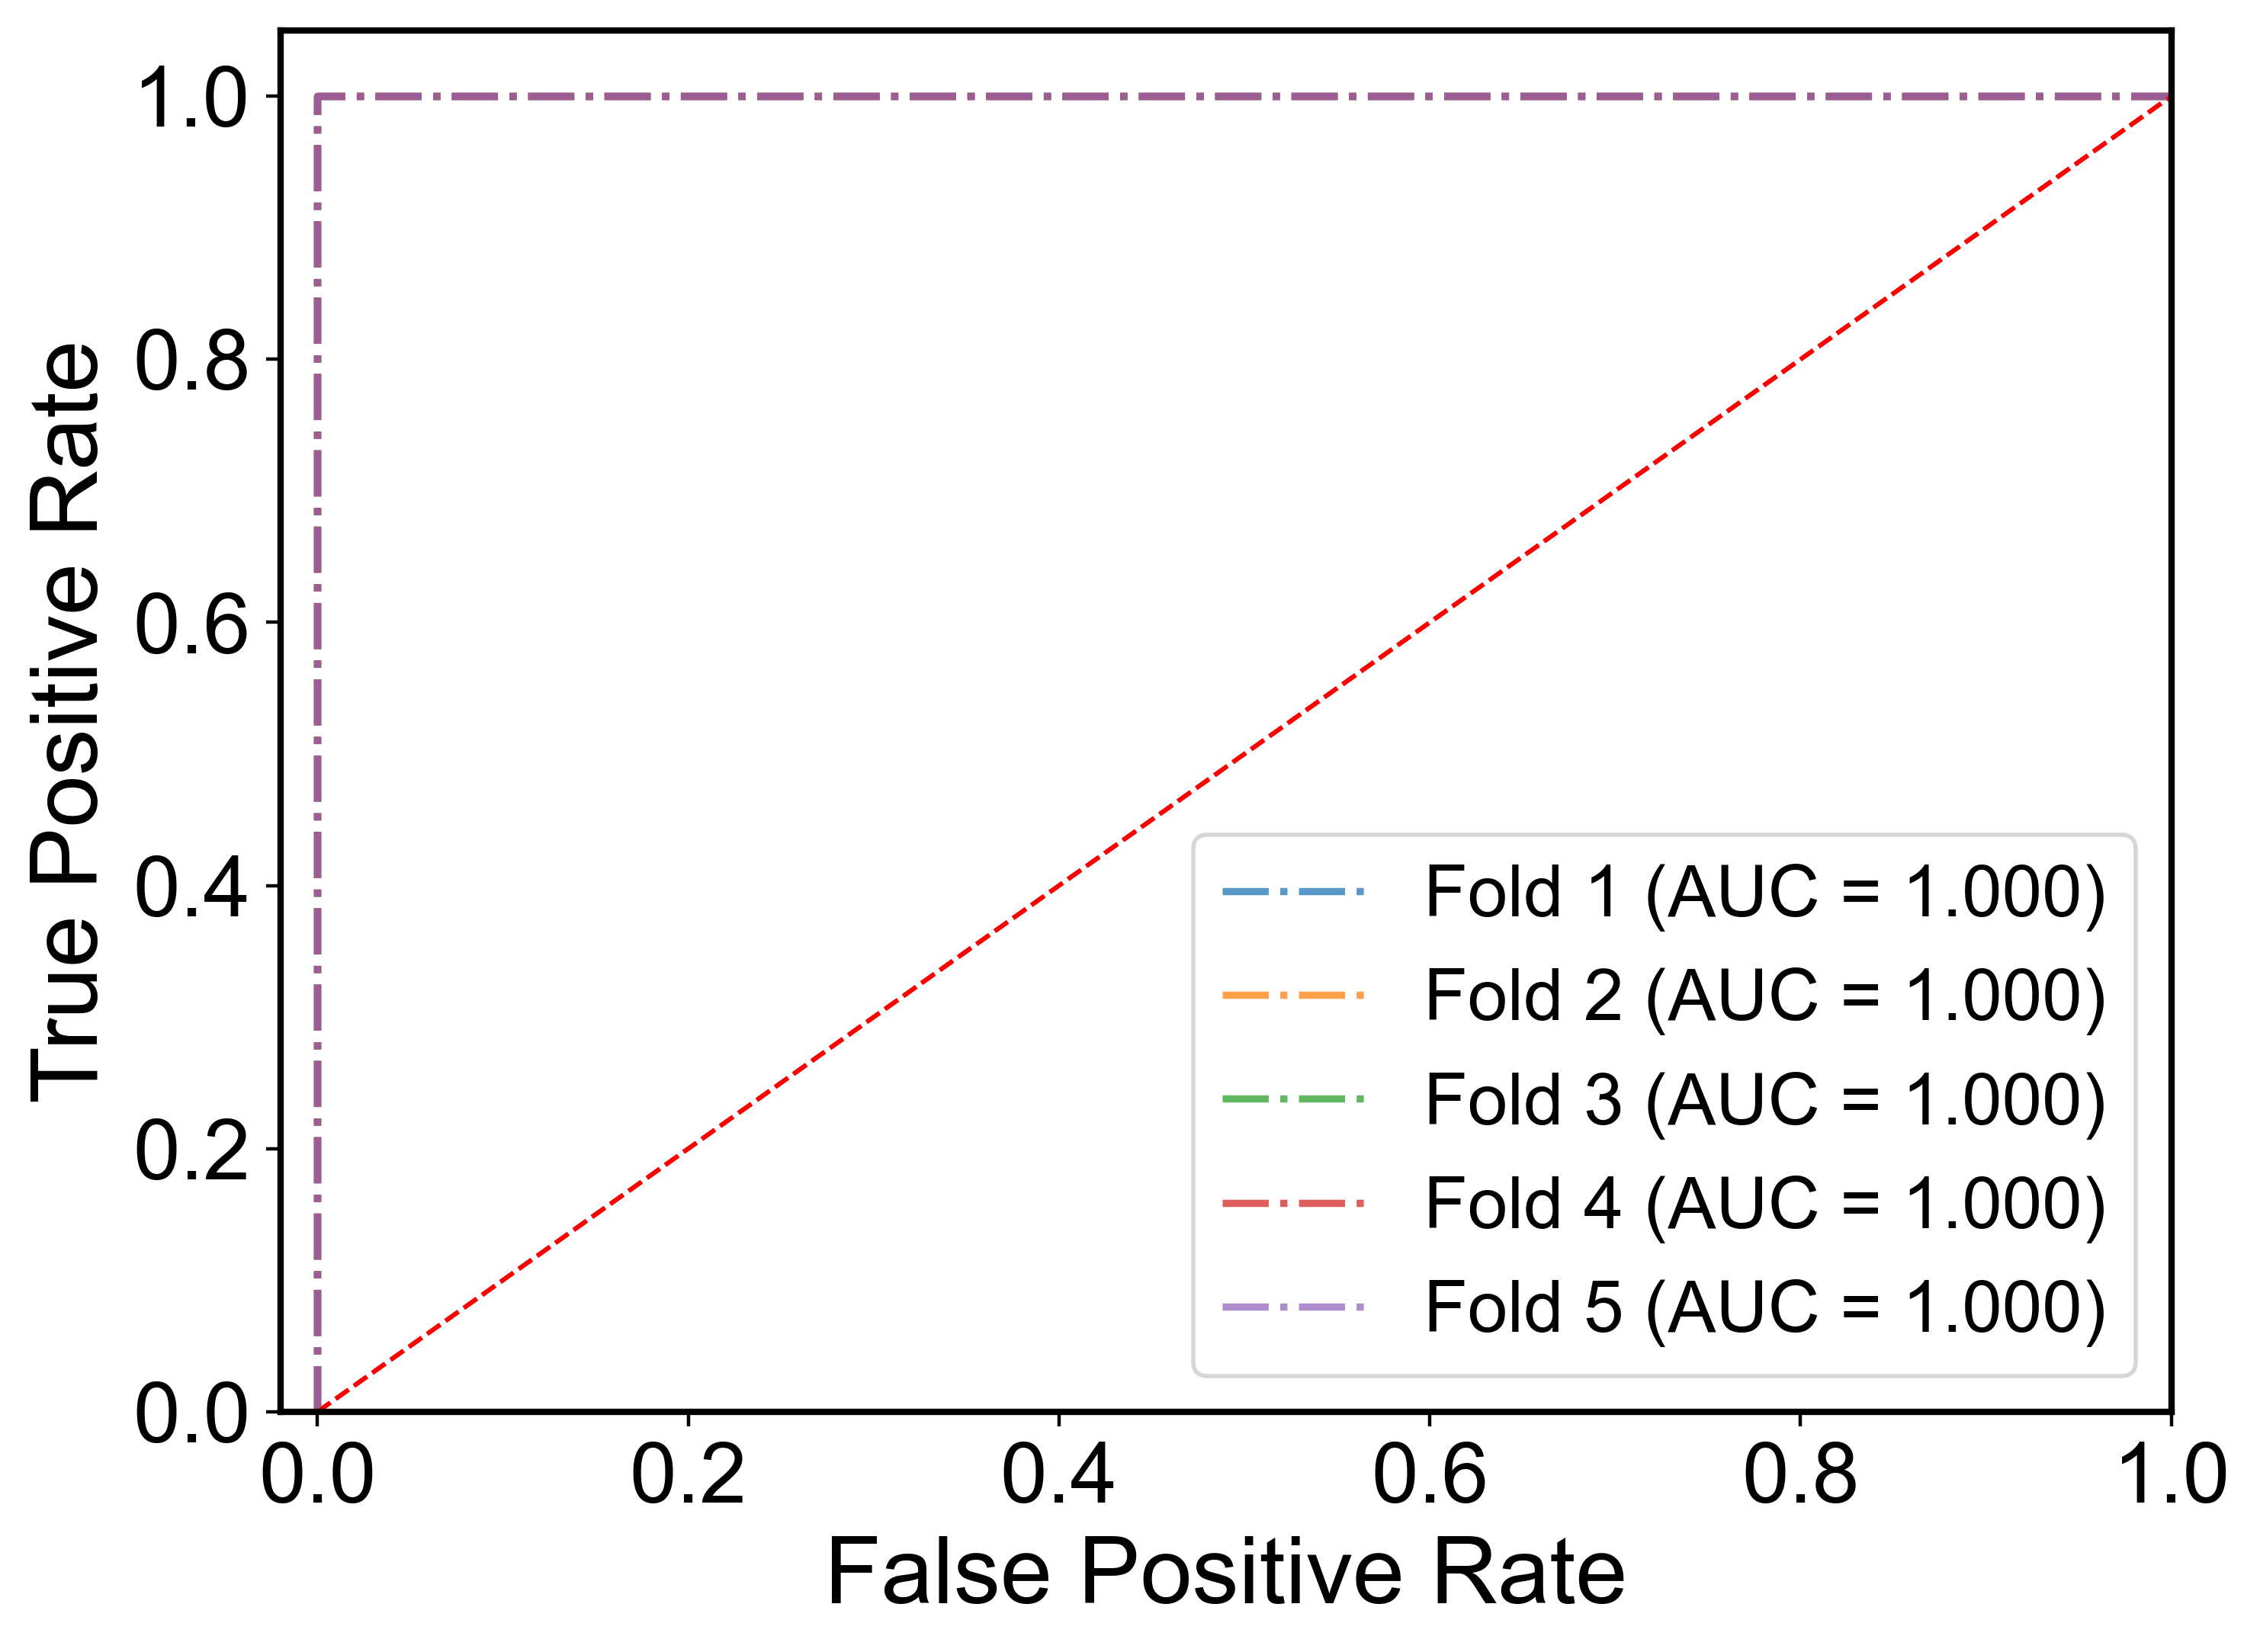

In [47]:
#!!!!!!
xb_models = fold5_ensemble(xb, X, y)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fold 1 Accuracy: 0.9953703703703703 F1_Score: 0.9961240310077519  ROC_AUC: 1.0
[LightGBM] [Warning] 

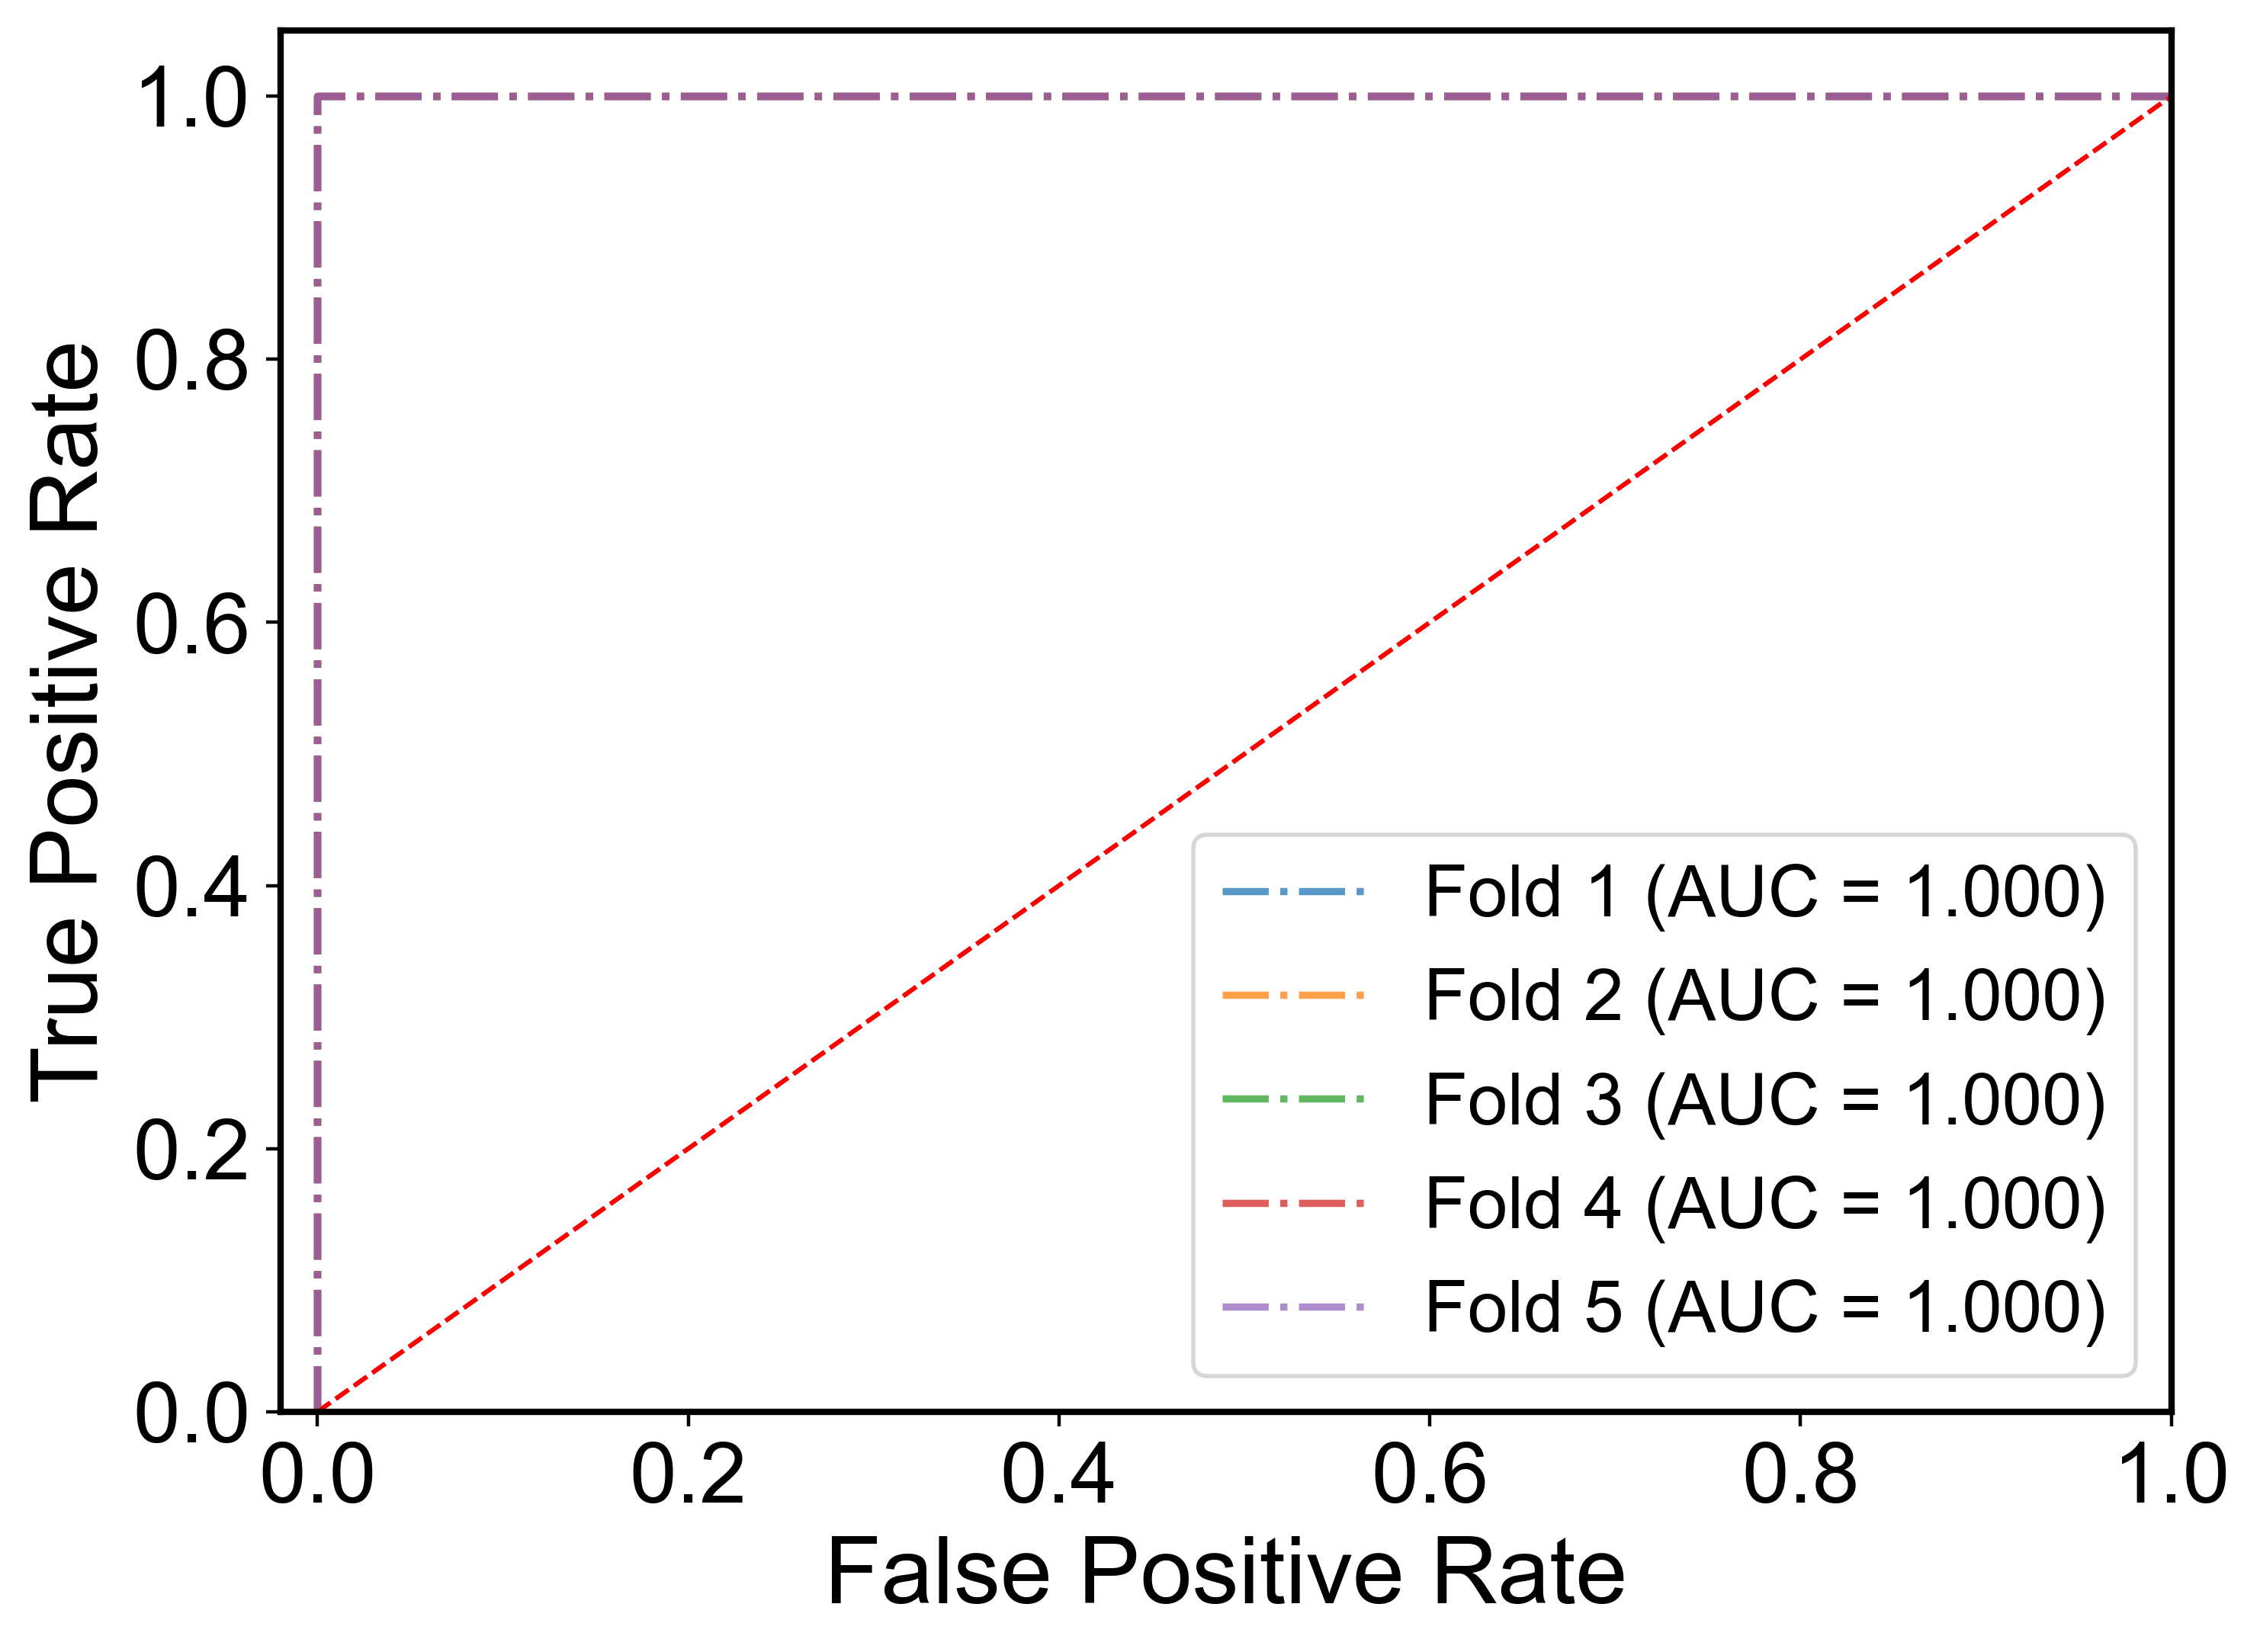

({'accuracy': 0.9981470739881413,
  'f1-score': 0.9984481071724242,
  'mcc': 0.9961630874388785,
  'roc_auc': 1.0,
  'recall': 0.9969052108586993},
 [LGBMClassifier(random_state=42, verbose=0),
  LGBMClassifier(random_state=42, verbose=0),
  LGBMClassifier(random_state=42, verbose=0),
  LGBMClassifier(random_state=42, verbose=0),
  LGBMClassifier(random_state=42, verbose=0)])

In [42]:
fold5_ensemble(lgbm, X, y)

Fold 1 Accuracy: 0.9976851851851852 F1_Score: 0.9980657640232108  ROC_AUC: 1.0
Fold 2 Accuracy: 0.9953703703703703 F1_Score: 0.9961089494163424  ROC_AUC: 1.0
Fold 3 Accuracy: 0.9976851851851852 F1_Score: 0.9980582524271845  ROC_AUC: 1.0
Fold 4 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 1.0
Fold 5 Accuracy: 0.9976798143851509 F1_Score: 0.9980582524271845  ROC_AUC: 1.0


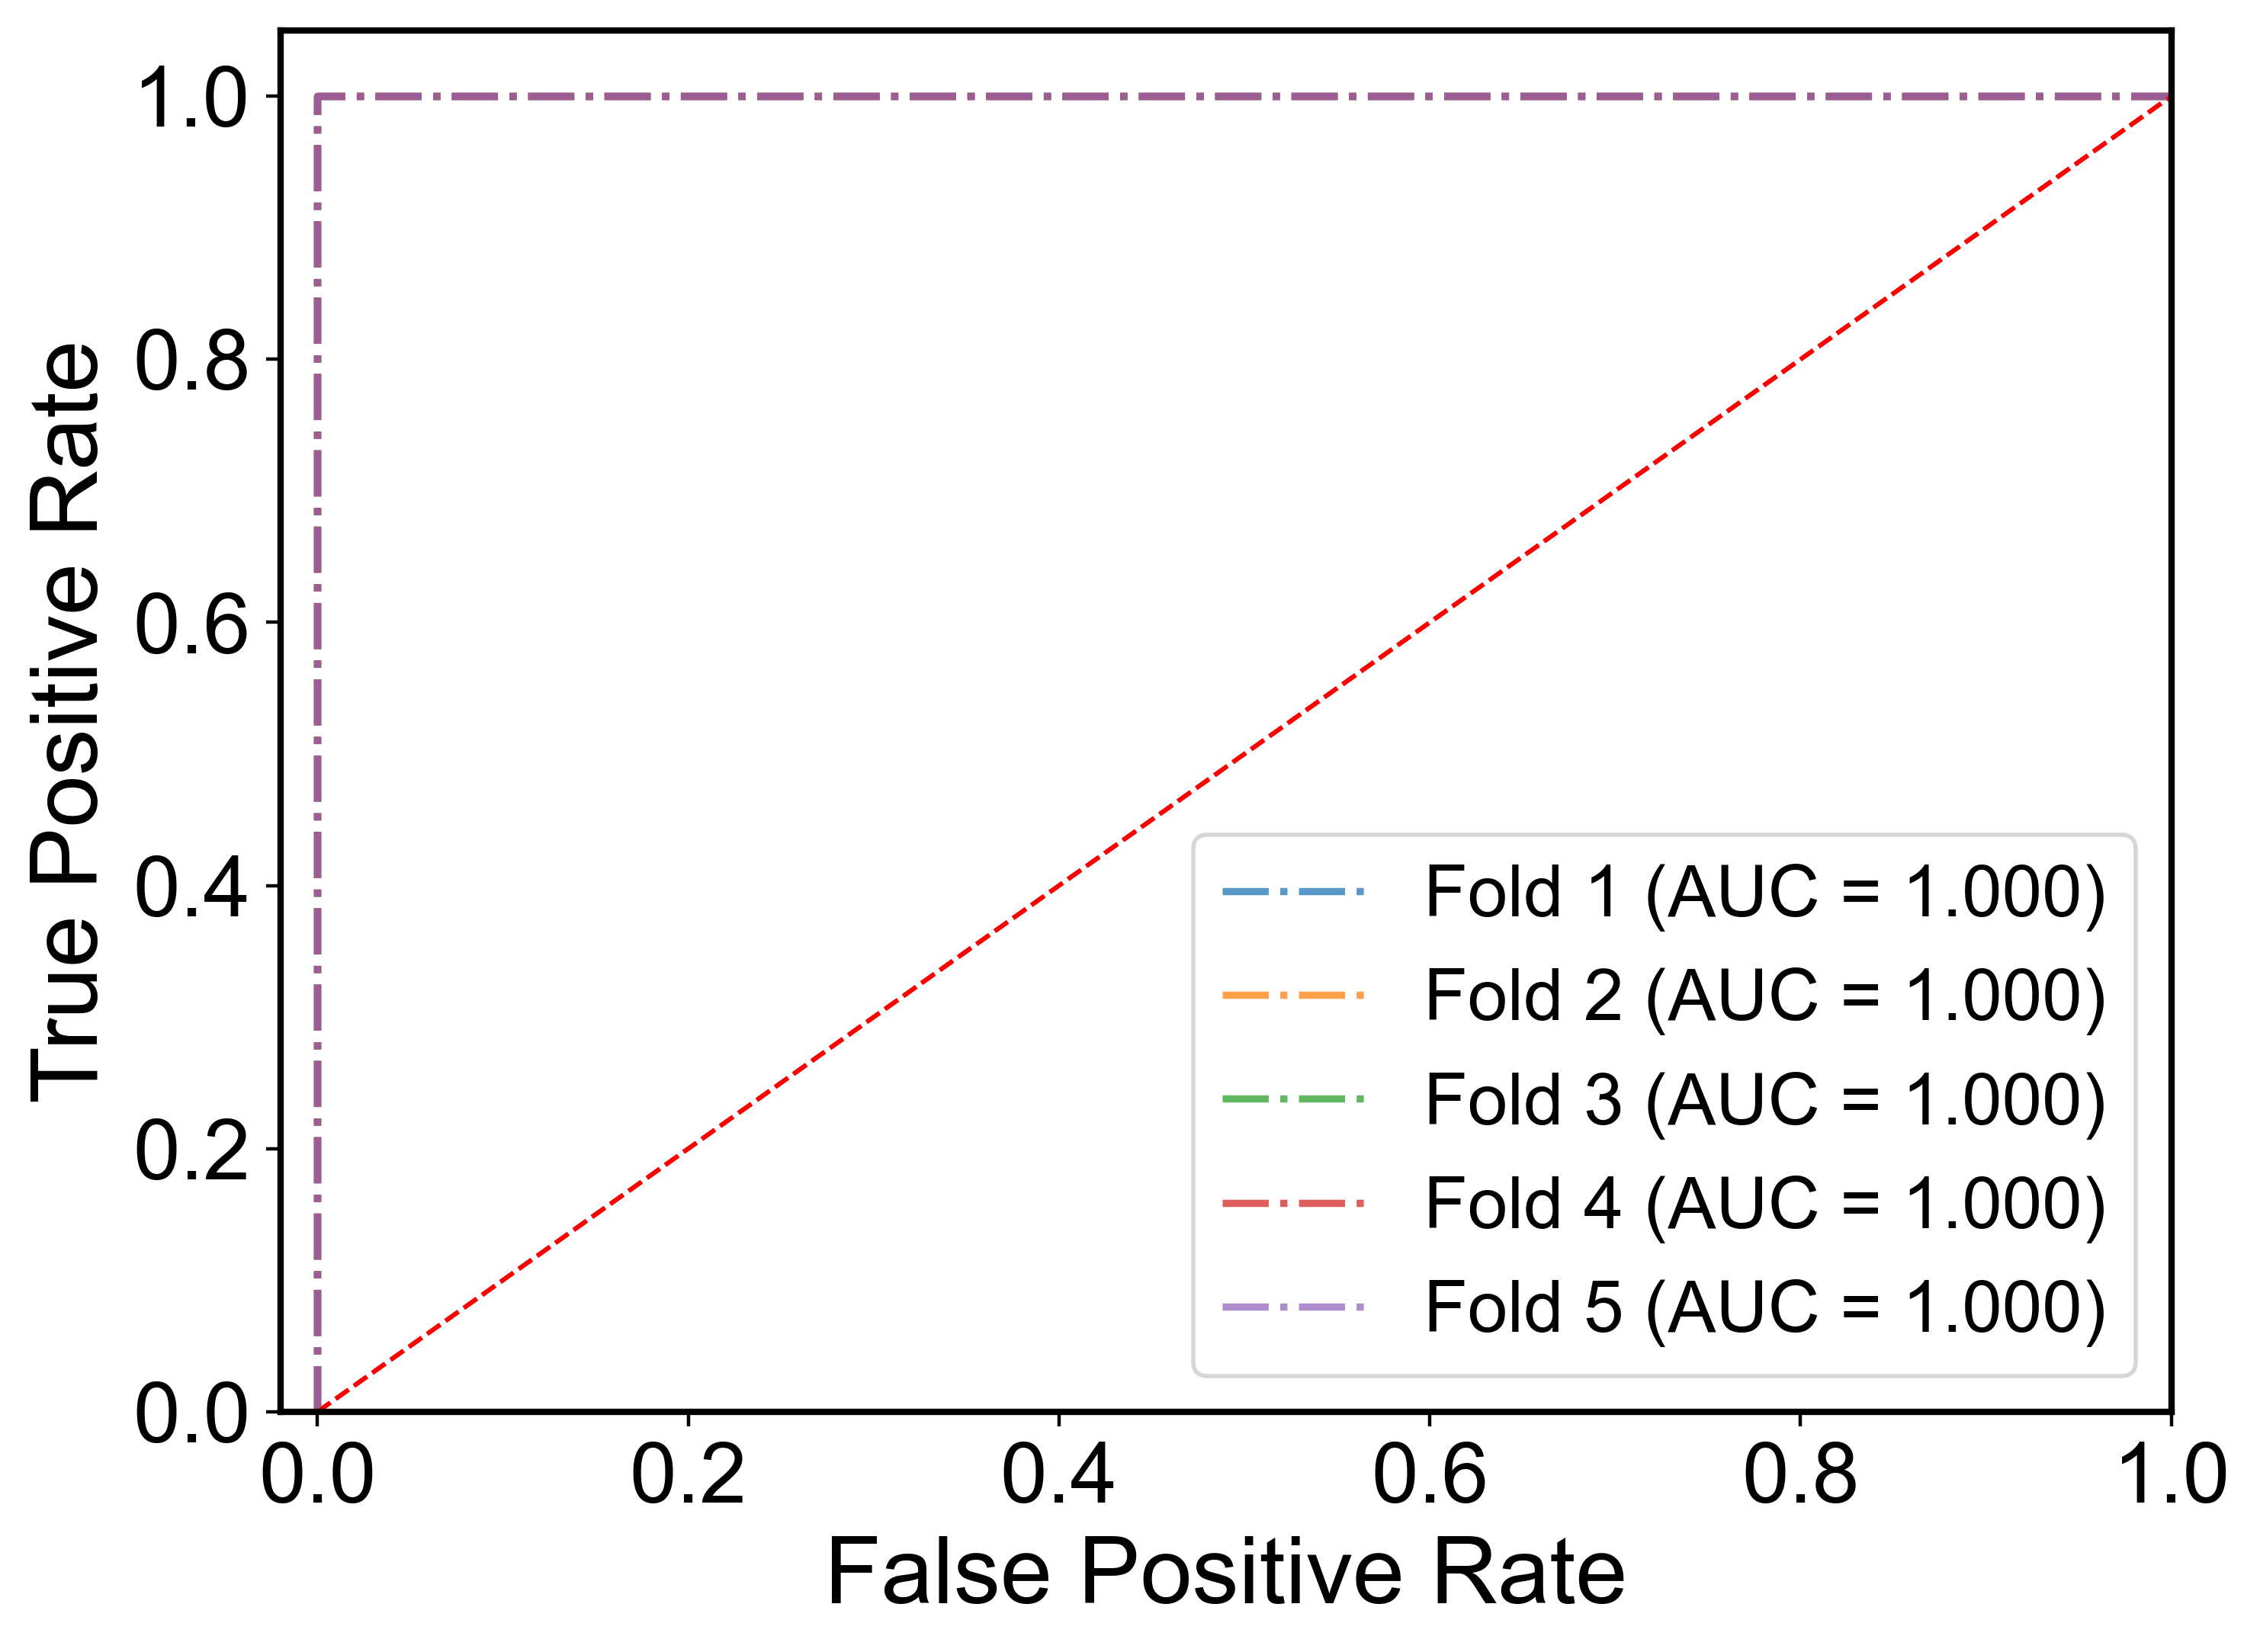

{'accuracy': 0.9976841110251783,
 'f1-score': 0.9980582436587845,
 'mcc': 0.9952057030534254,
 'roc_auc': 1.0,
 'recall': 0.9961270240340008}

In [43]:
ext_result, ext_models = fold5_ensemble(ext, X, y)
ext_result

Fold 1 Accuracy: 0.9953703703703703 F1_Score: 0.9961240310077519  ROC_AUC: 1.0
Fold 2 Accuracy: 0.9976851851851852 F1_Score: 0.9980582524271845  ROC_AUC: 1.0
Fold 3 Accuracy: 0.9976851851851852 F1_Score: 0.9980582524271845  ROC_AUC: 1.0
Fold 4 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 1.0
Fold 5 Accuracy: 0.9976798143851509 F1_Score: 0.9980582524271845  ROC_AUC: 1.0


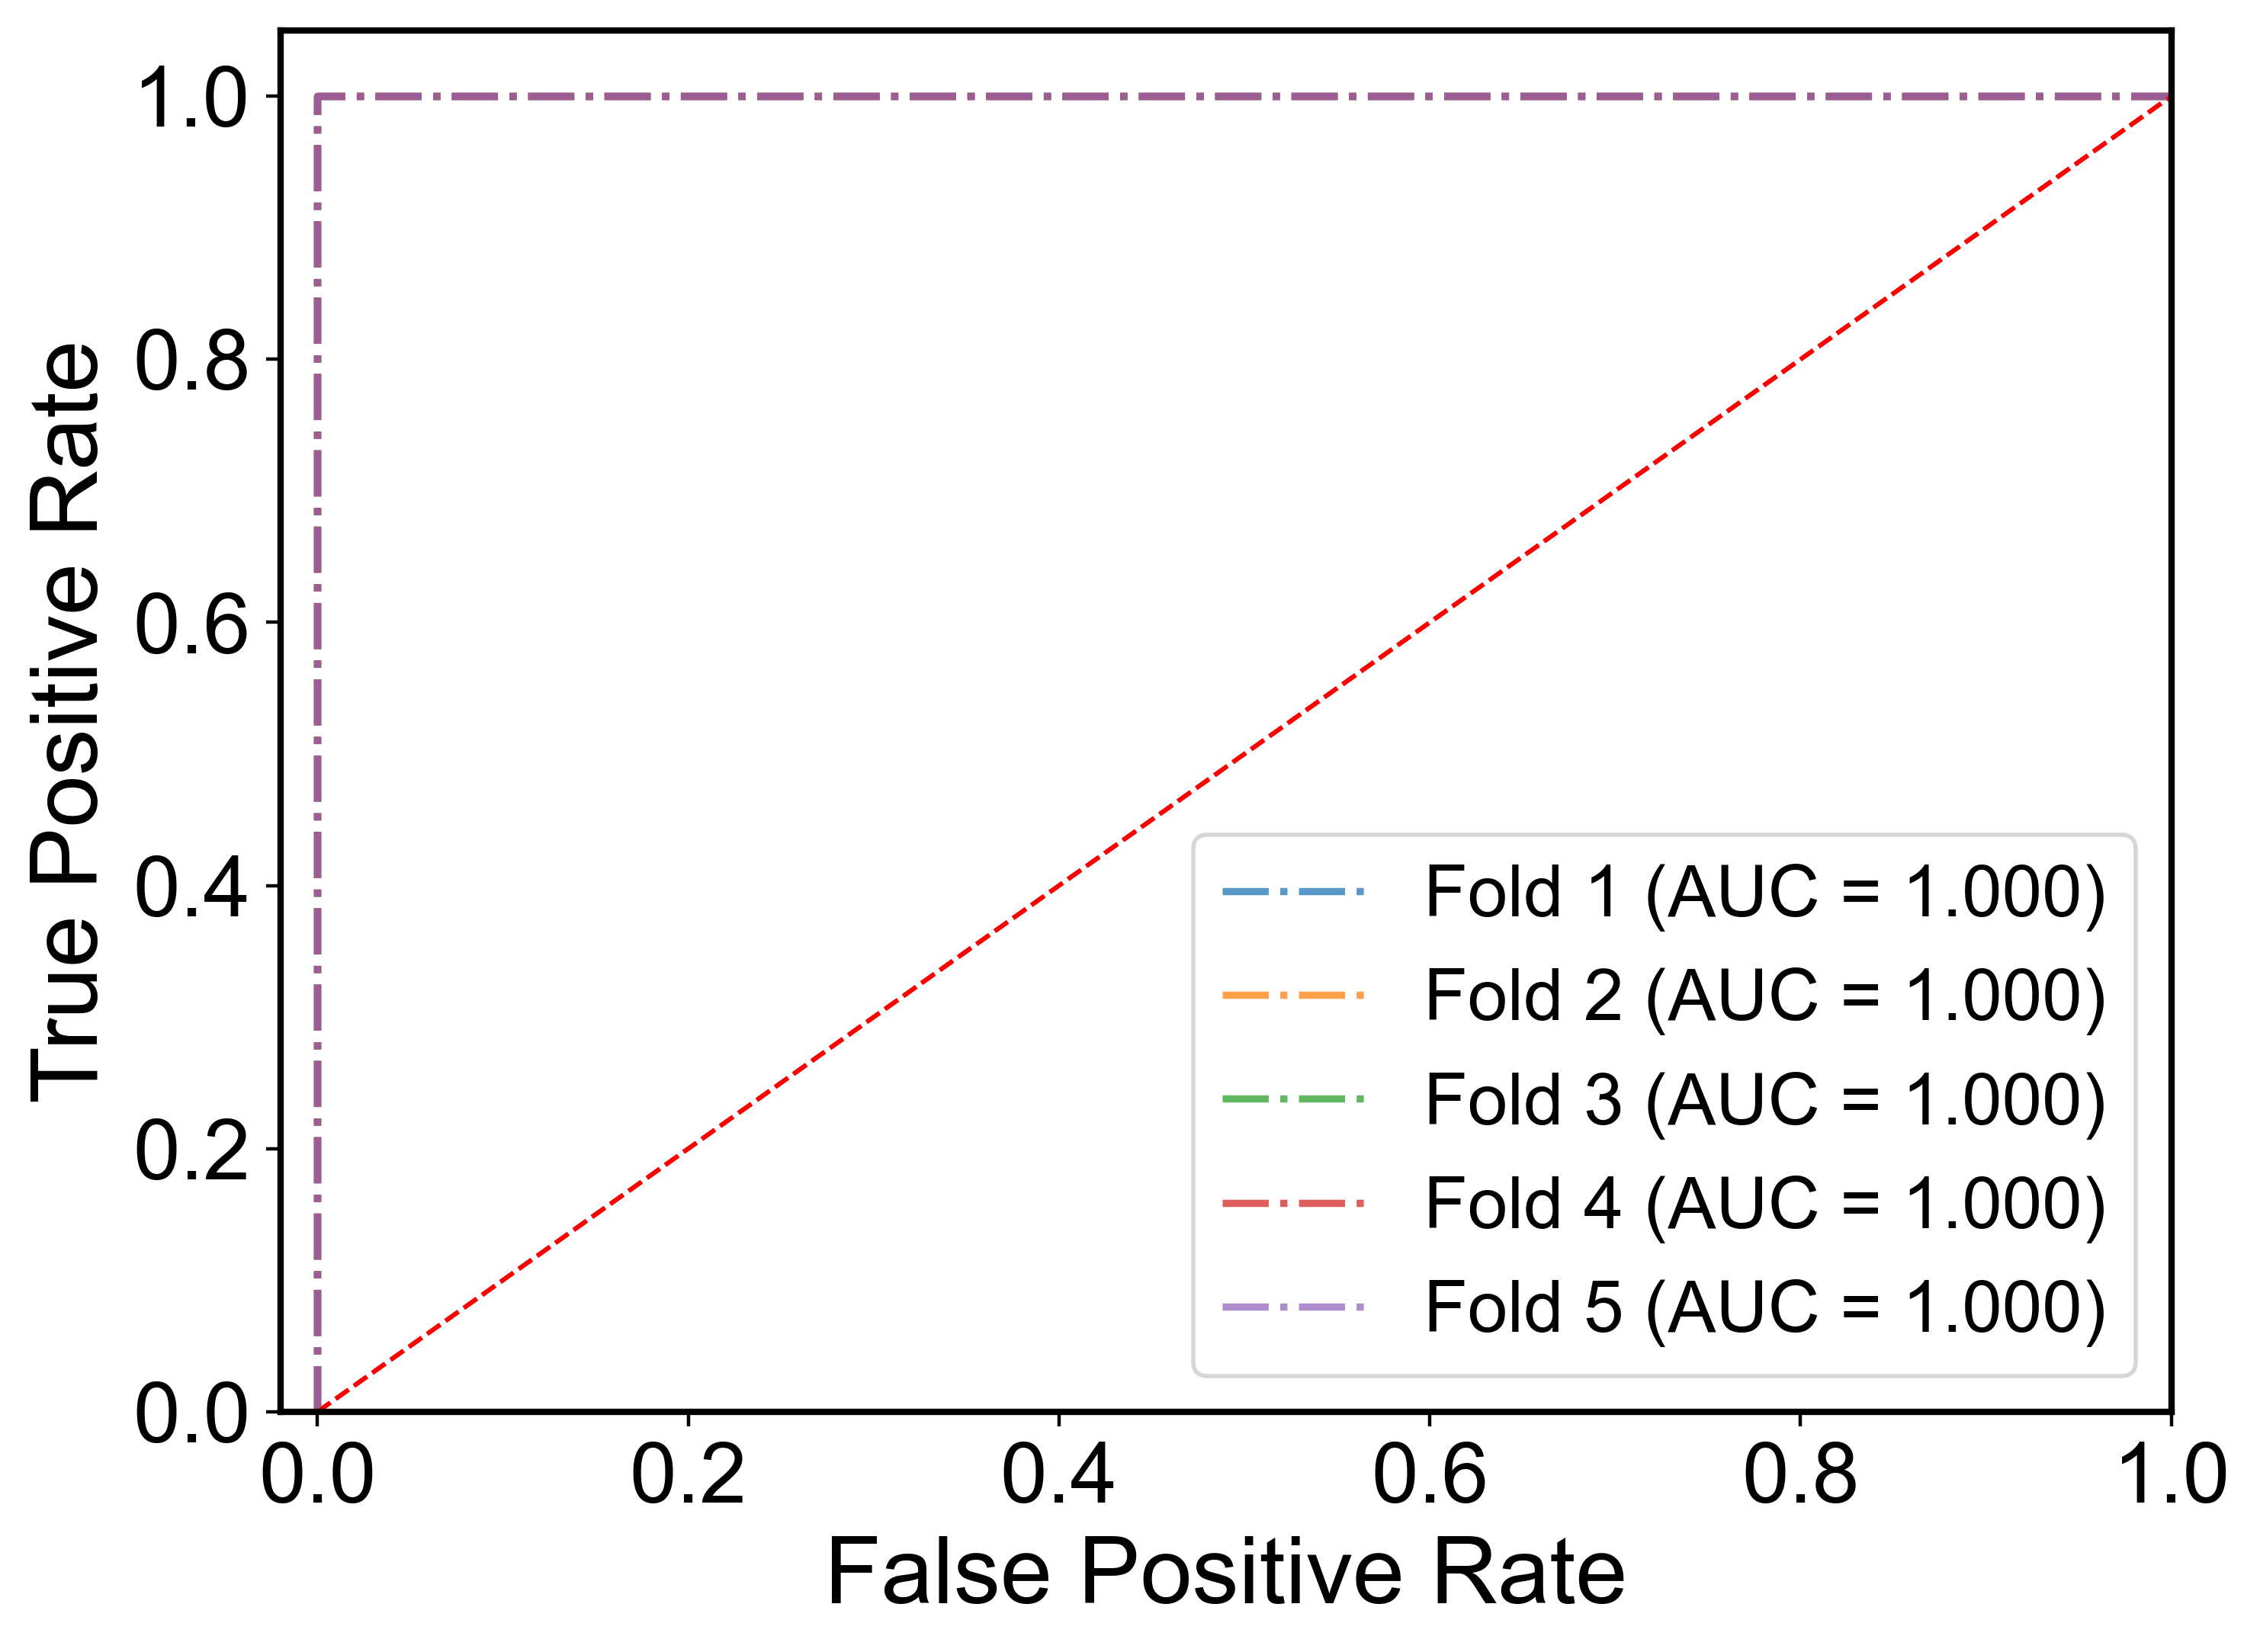

{'accuracy': 0.9976841110251783,
 'f1-score': 0.998059757657861,
 'mcc': 0.9952039770759283,
 'roc_auc': 1.0,
 'recall': 0.9961300170602495}

In [44]:
gbc_result, gbc_models = fold5_ensemble(gbc, X, y)
gbc_result

Fold 1 Accuracy: 0.9722222222222222 F1_Score: 0.9773584905660377  ROC_AUC: 0.9673488517419153
Fold 2 Accuracy: 0.9745370370370371 F1_Score: 0.9791271347248577  ROC_AUC: 0.9680232558139534
Fold 3 Accuracy: 0.9652777777777778 F1_Score: 0.9717514124293786  ROC_AUC: 0.9614853426000178
Fold 4 Accuracy: 0.9375 F1_Score: 0.9502762430939227  ROC_AUC: 0.923260269090261
Fold 5 Accuracy: 0.9396751740139211 F1_Score: 0.952029520295203  ROC_AUC: 0.9327530582067483


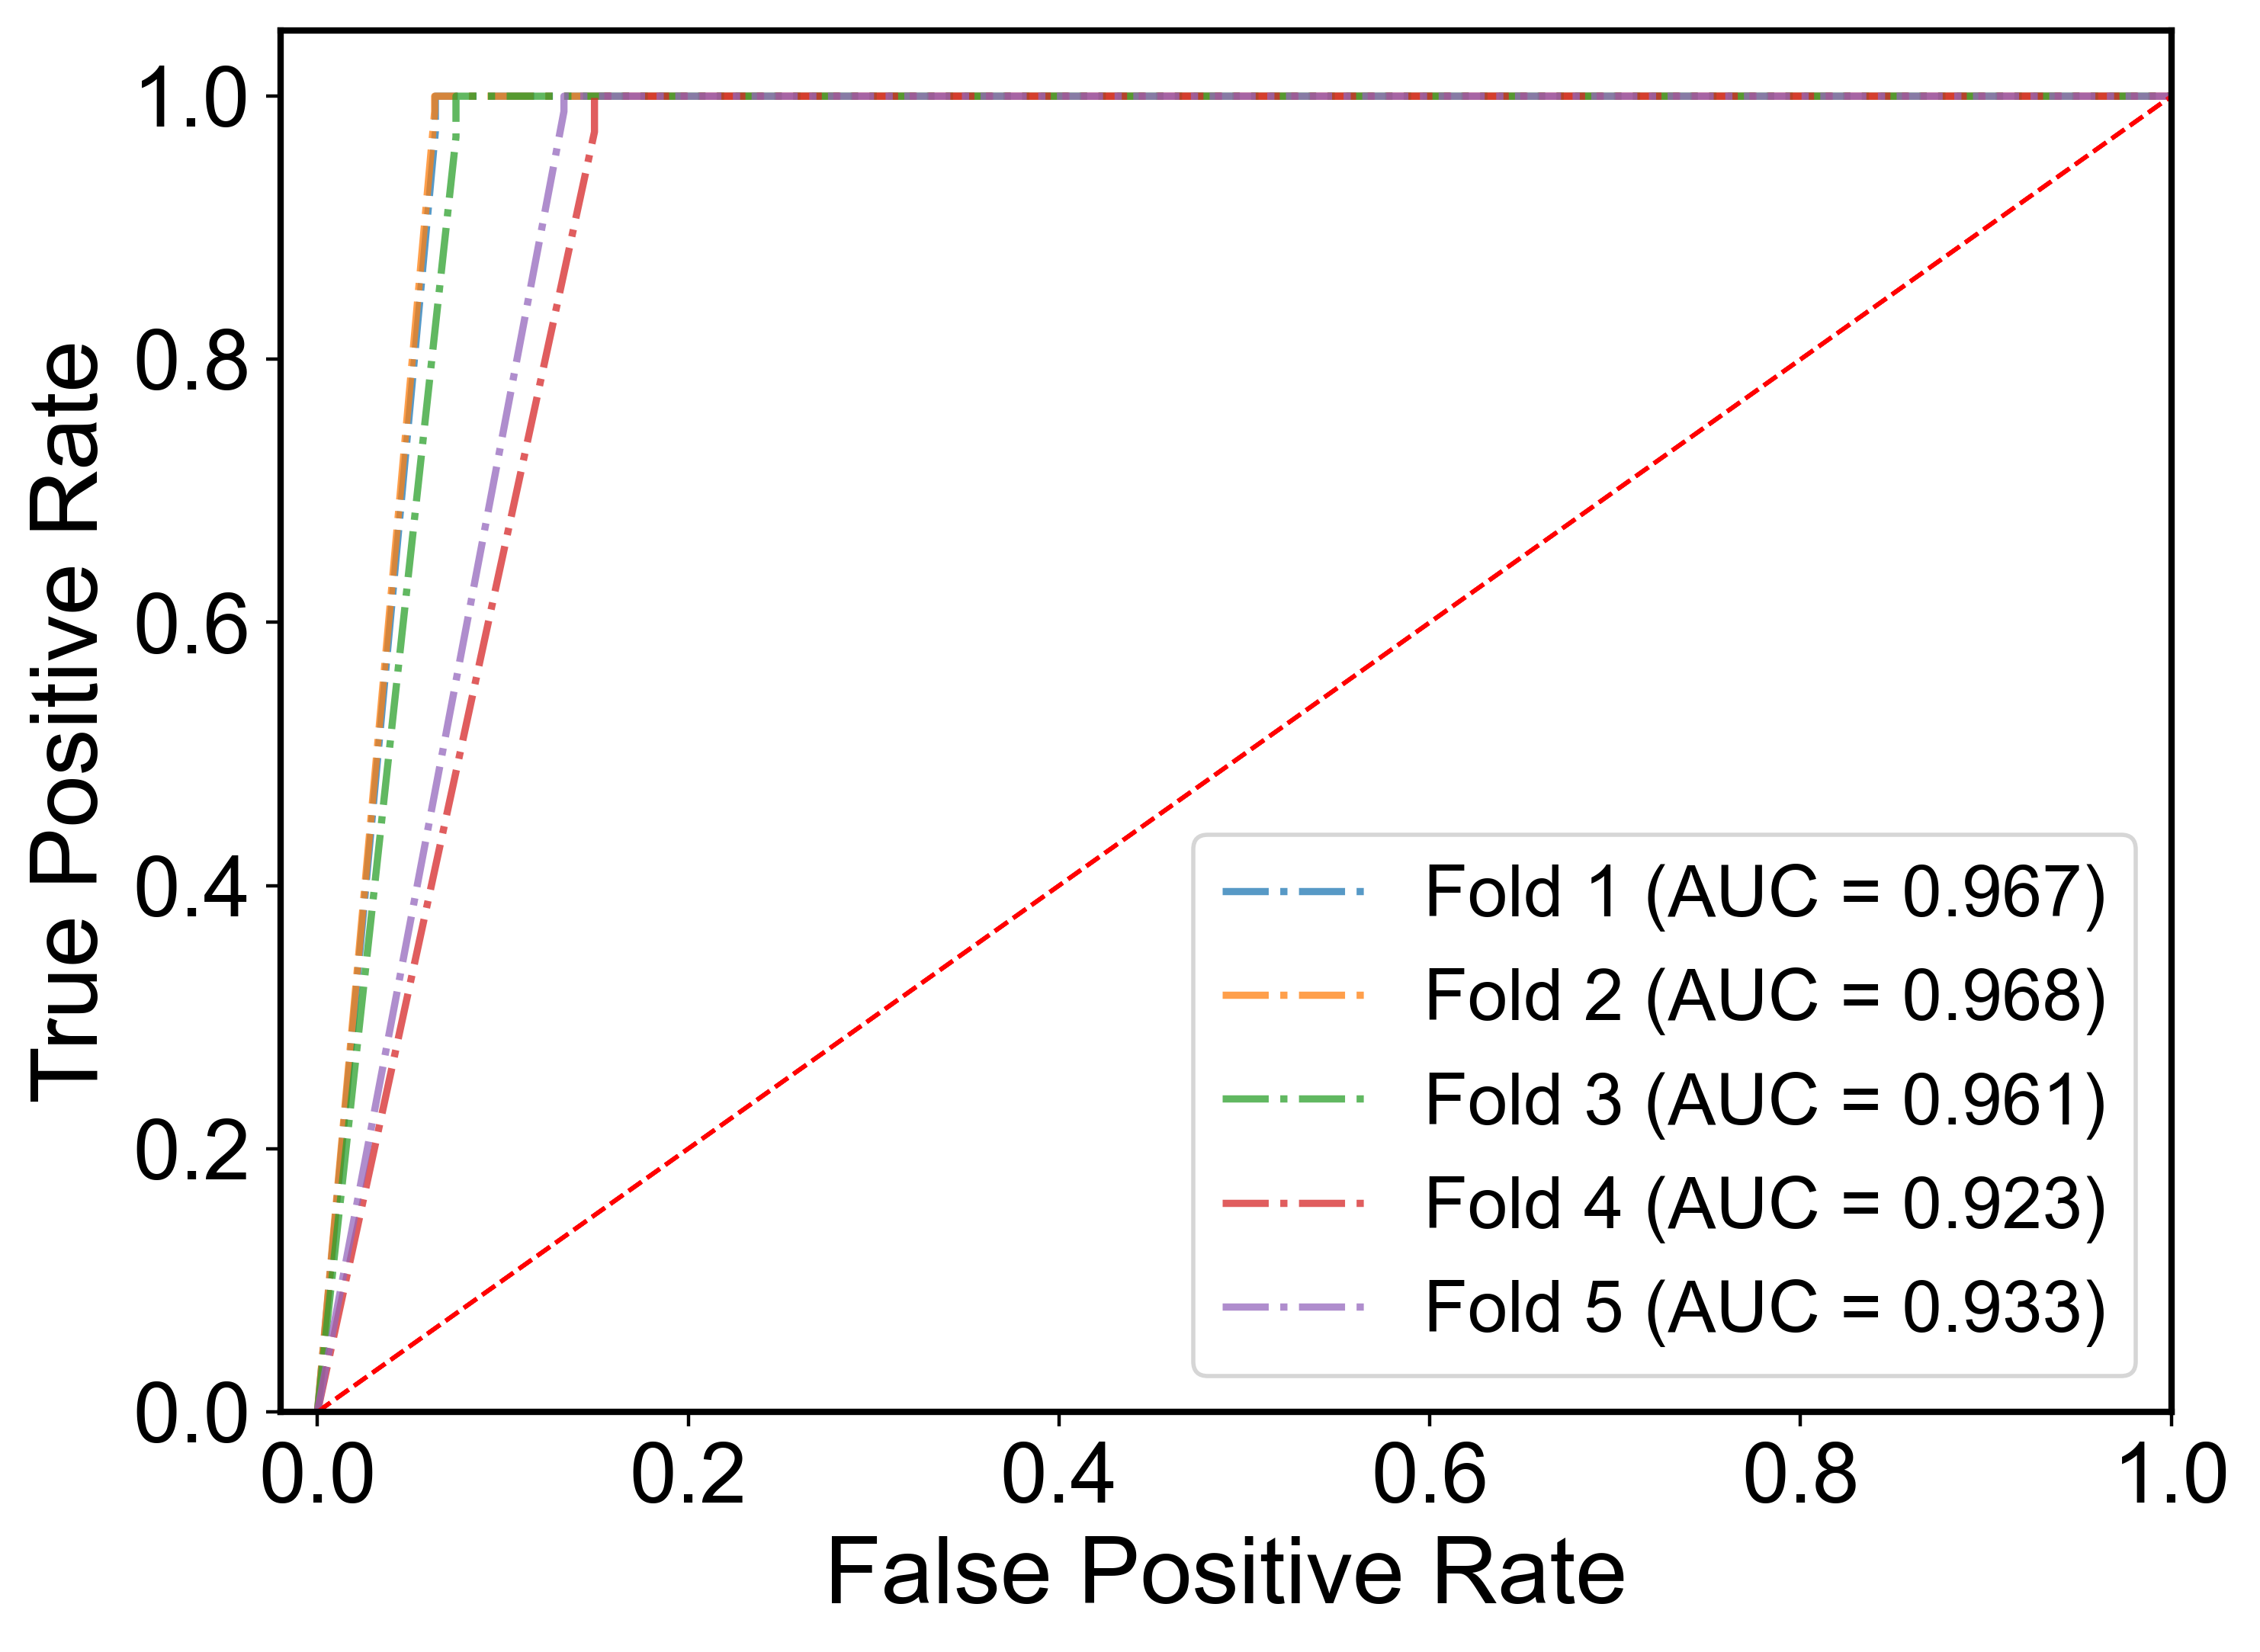

{'accuracy': 0.9578424422101917,
 'f1-score': 0.96610856022188,
 'mcc': 0.9146758818959547,
 'roc_auc': 0.9505741554905793,
 'recall': 1.0}

In [45]:
gnb_result, gnb_models = fold5_ensemble(gnb, X, y)
gnb_result

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import seaborn as sns  

def fold5_pic_ensemble(model, X, y, name='', is_plot=True):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    models = []
    accuracies = []
    f1s = []
    mccs = []
    roc_aucs = []
    recalls = []
    
    first_cm_saved = False

    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        try:
            X = X.values
            y = y.values
        except:
            pass
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

        model.fit(X_train_balanced, y_train_balanced)
        models.append(model)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        mcc = metrics.matthews_corrcoef(y_test, y_pred)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
        roc_auc = metrics.auc(fpr, tpr)
        recall = metrics.recall_score(y_test, y_pred)
        accuracies.append(accuracy)
        f1s.append(f1)
        mccs.append(mcc)
        roc_aucs.append(roc_auc)
        recalls.append(recall)

        print(f"Fold {i+1} Accuracy: {accuracy} F1_Score: {f1}  ROC_AUC: {roc_auc}")

        if not first_cm_saved:  
            cm = metrics.confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted labels',fontsize='22')
            plt.ylabel('True labels',fontsize = '22')
           # plt.title('Confusion Matrix')
            plt.savefig(f'./picture/sp_confusion_matrix.png', dpi=300)  
            #plt.close()  
            first_cm_saved = True 
            ax.tick_params(axis='both', which='major', labelsize=20)
    result = {
        'accuracy': np.mean(accuracies),
        'f1-score': np.mean(f1s),
        'mcc': np.mean(mccs),
        'roc_auc': np.mean(roc_aucs),
        'recall': np.mean(recalls)
    }
    if is_plot:
        plt.show()
    return result, models

Fold 1 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 0.9999999999999999
Fold 2 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 1.0
Fold 3 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 1.0
Fold 4 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 0.9999999999999999
Fold 5 Accuracy: 1.0 F1_Score: 1.0  ROC_AUC: 0.9999999999999999


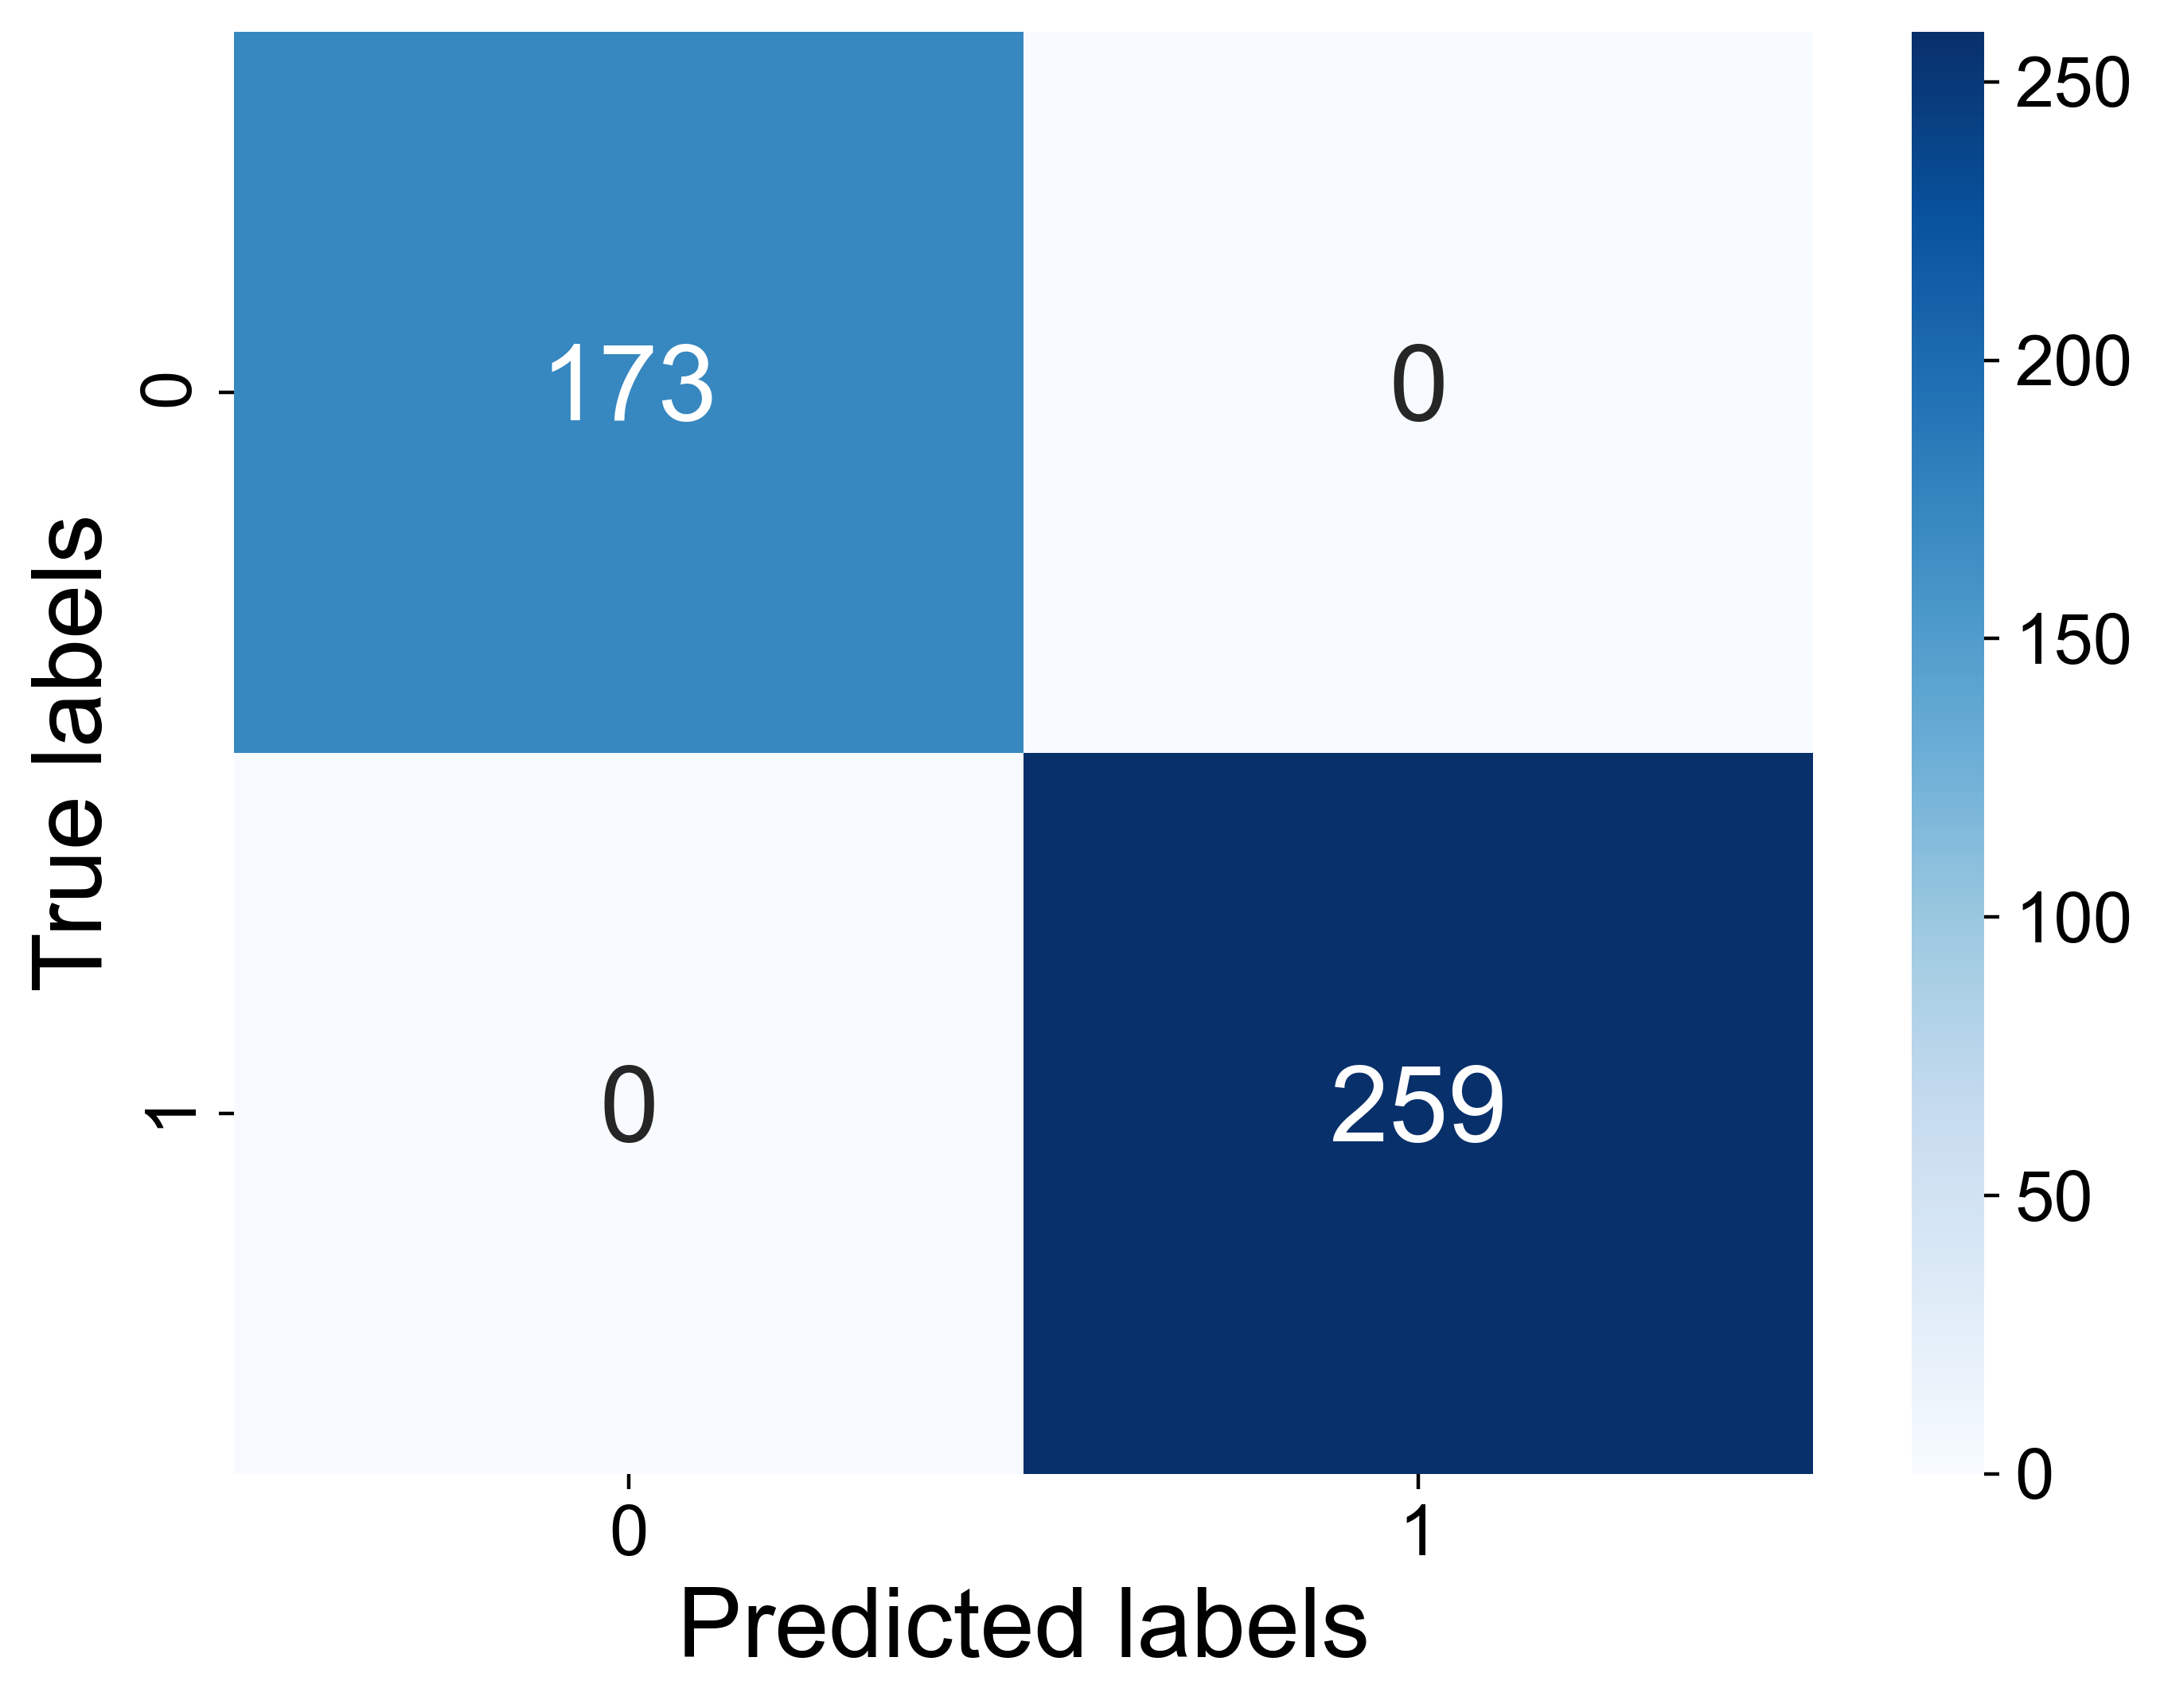

{'accuracy': 1.0, 'f1-score': 1.0, 'mcc': 1.0, 'roc_auc': 1.0, 'recall': 1.0}

In [36]:
xb_pic_result, xb_pic_models = fold5_pic_ensemble(xb, X, y)
xb_pic_result

In [48]:
from joblib import dump
dump(xb_models, './model/sp_xgb_cn.joblib')
# loaded_model = load(model_filename)

['./model/sp_xgb_cn.joblib']

In [49]:
from joblib import load
xb_models = load('./model/sp_xgb_cn.joblib')

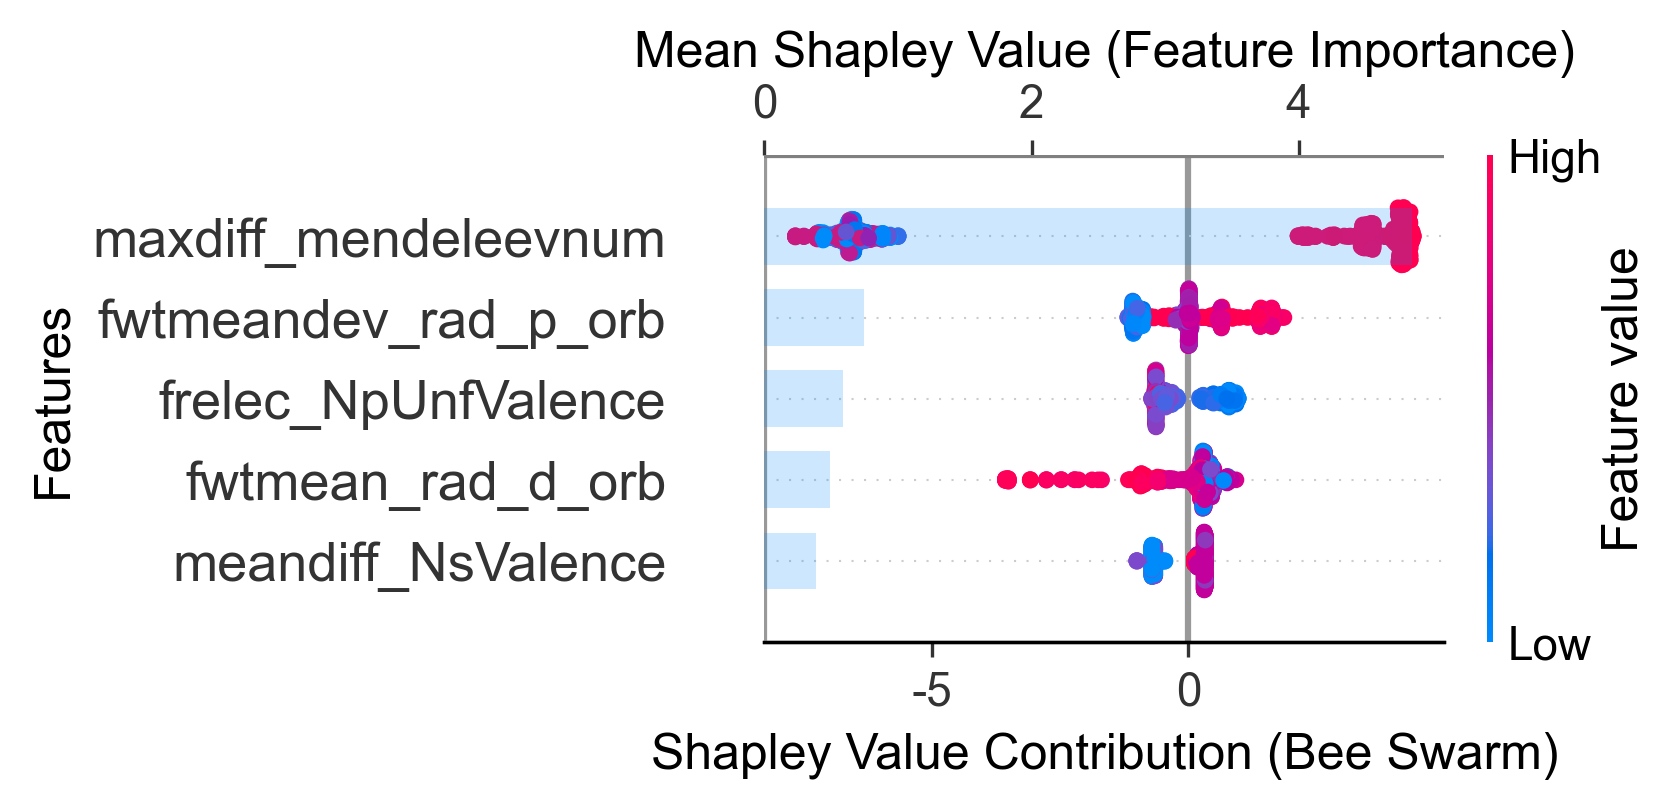

In [101]:
shap.summary_plot(shap_values, test, max_display=5, plot_type="dot", show=False, color_bar=True)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65]) 
ax1 = plt.gca()
ax2 = ax1.twiny()
shap.summary_plot(shap_values, test, max_display=5, plot_type="bar", show=False)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65])  
ax2.axhline(y=5, color='gray', linestyle='-', linewidth=1.5) 
bars = ax2.patches  

for bar in bars:    
    bar.set_alpha(0.2)  

ax1.set_xlabel('Shapley Value Contribution (Bee Swarm)', fontsize=12)
ax2.set_xlabel('Mean Shapley Value (Feature Importance)', fontsize=12)

ax2.xaxis.set_ticks_position('top') 
ax2.xaxis.set_label_position('top')

ax1.set_ylabel('Features', fontsize=12)
plt.tight_layout()
plt.savefig('./picture/sp_shap.png', bbox_inches='tight')
plt.show()

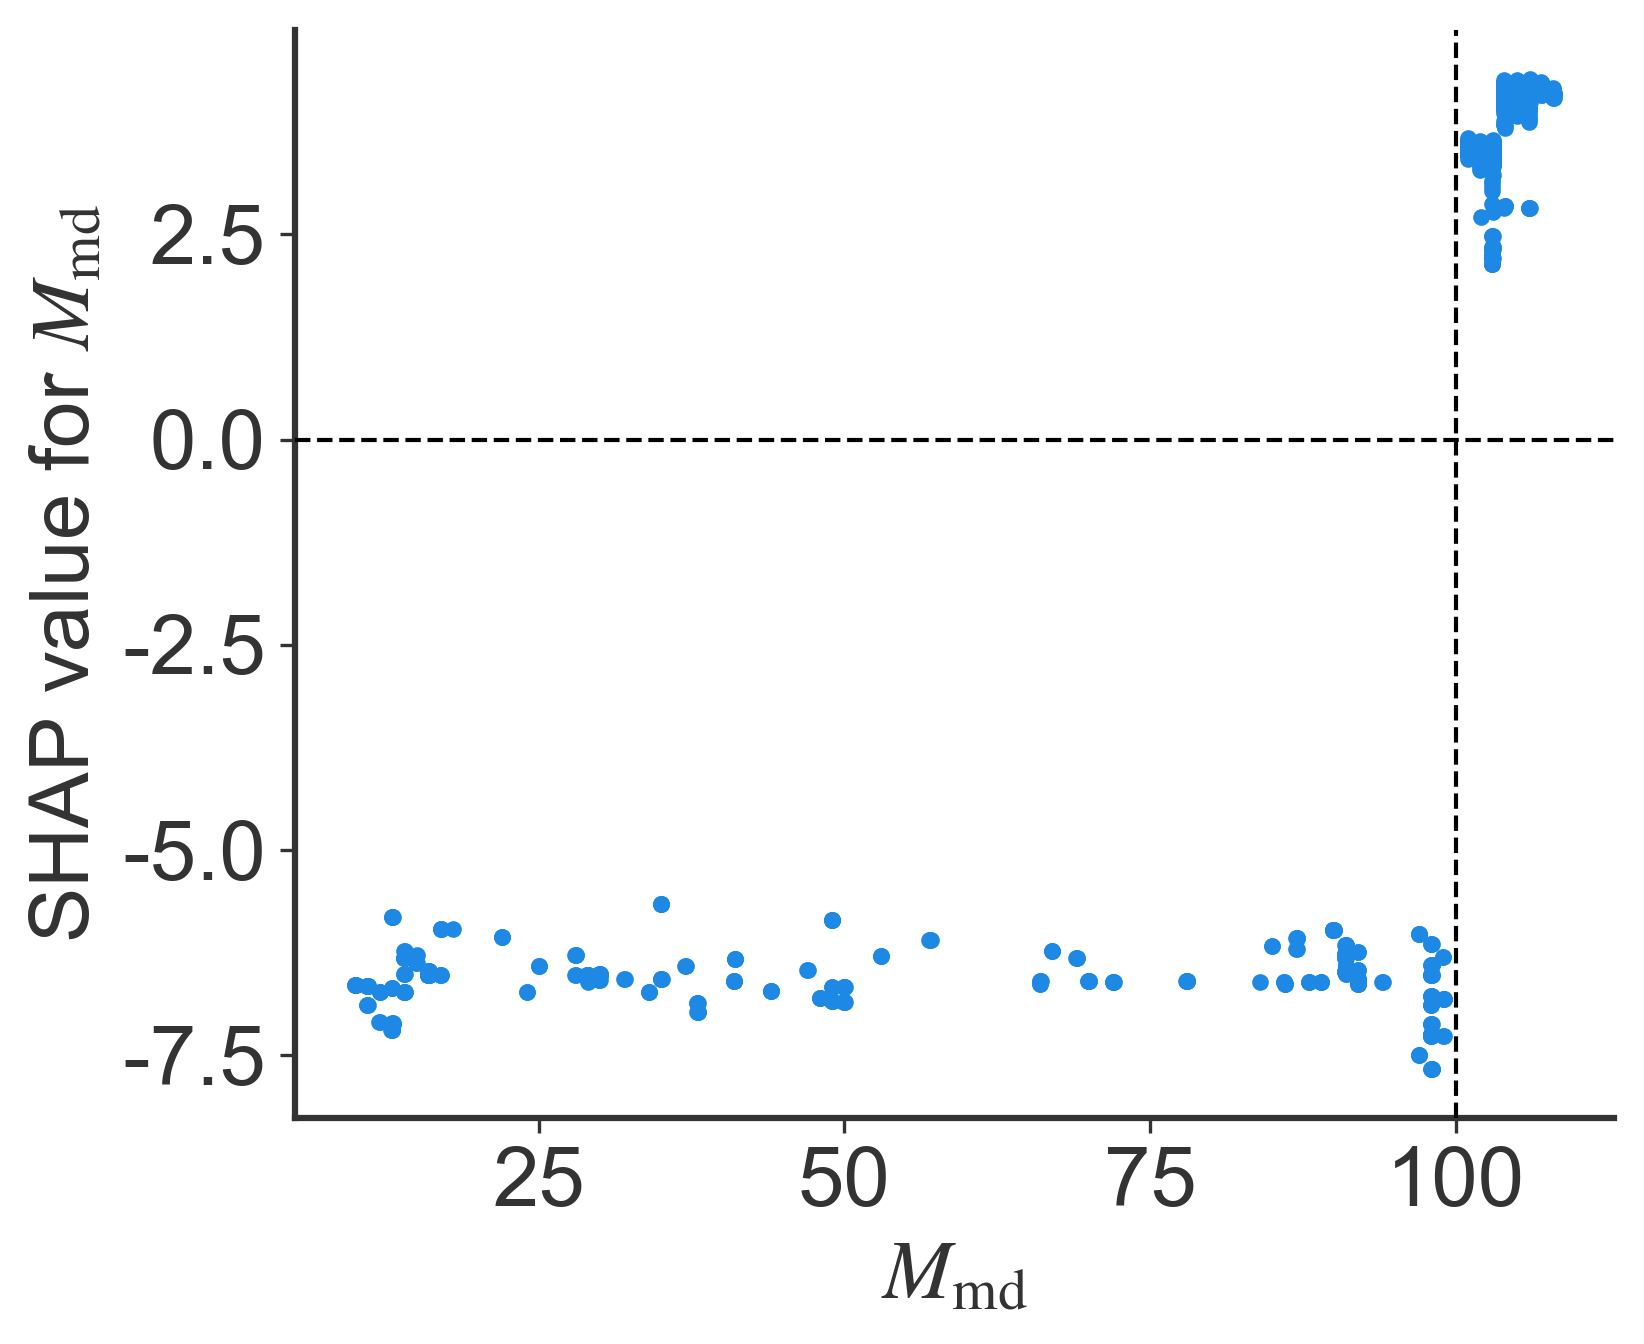

In [106]:
shap.plots.scatter(shap_values[:, 'maxdiff_mendeleevnum'], hist=False,show=False)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r"$M_{\mathrm{md}}$", fontsize=20)
ax.set_ylabel(r"SHAP value for $M_{\mathrm{md}}$", fontsize=20)
plt.tight_layout()
ax.axhline(y=0,color='black',linestyle='--',linewidth=1,zorder=3)
ax.axvline(x=100,color='black',linestyle='--',linewidth=1,zorder=3)
plt.savefig("./picture/sp_shap1.png", dpi=300, bbox_inches="tight")
plt.show()

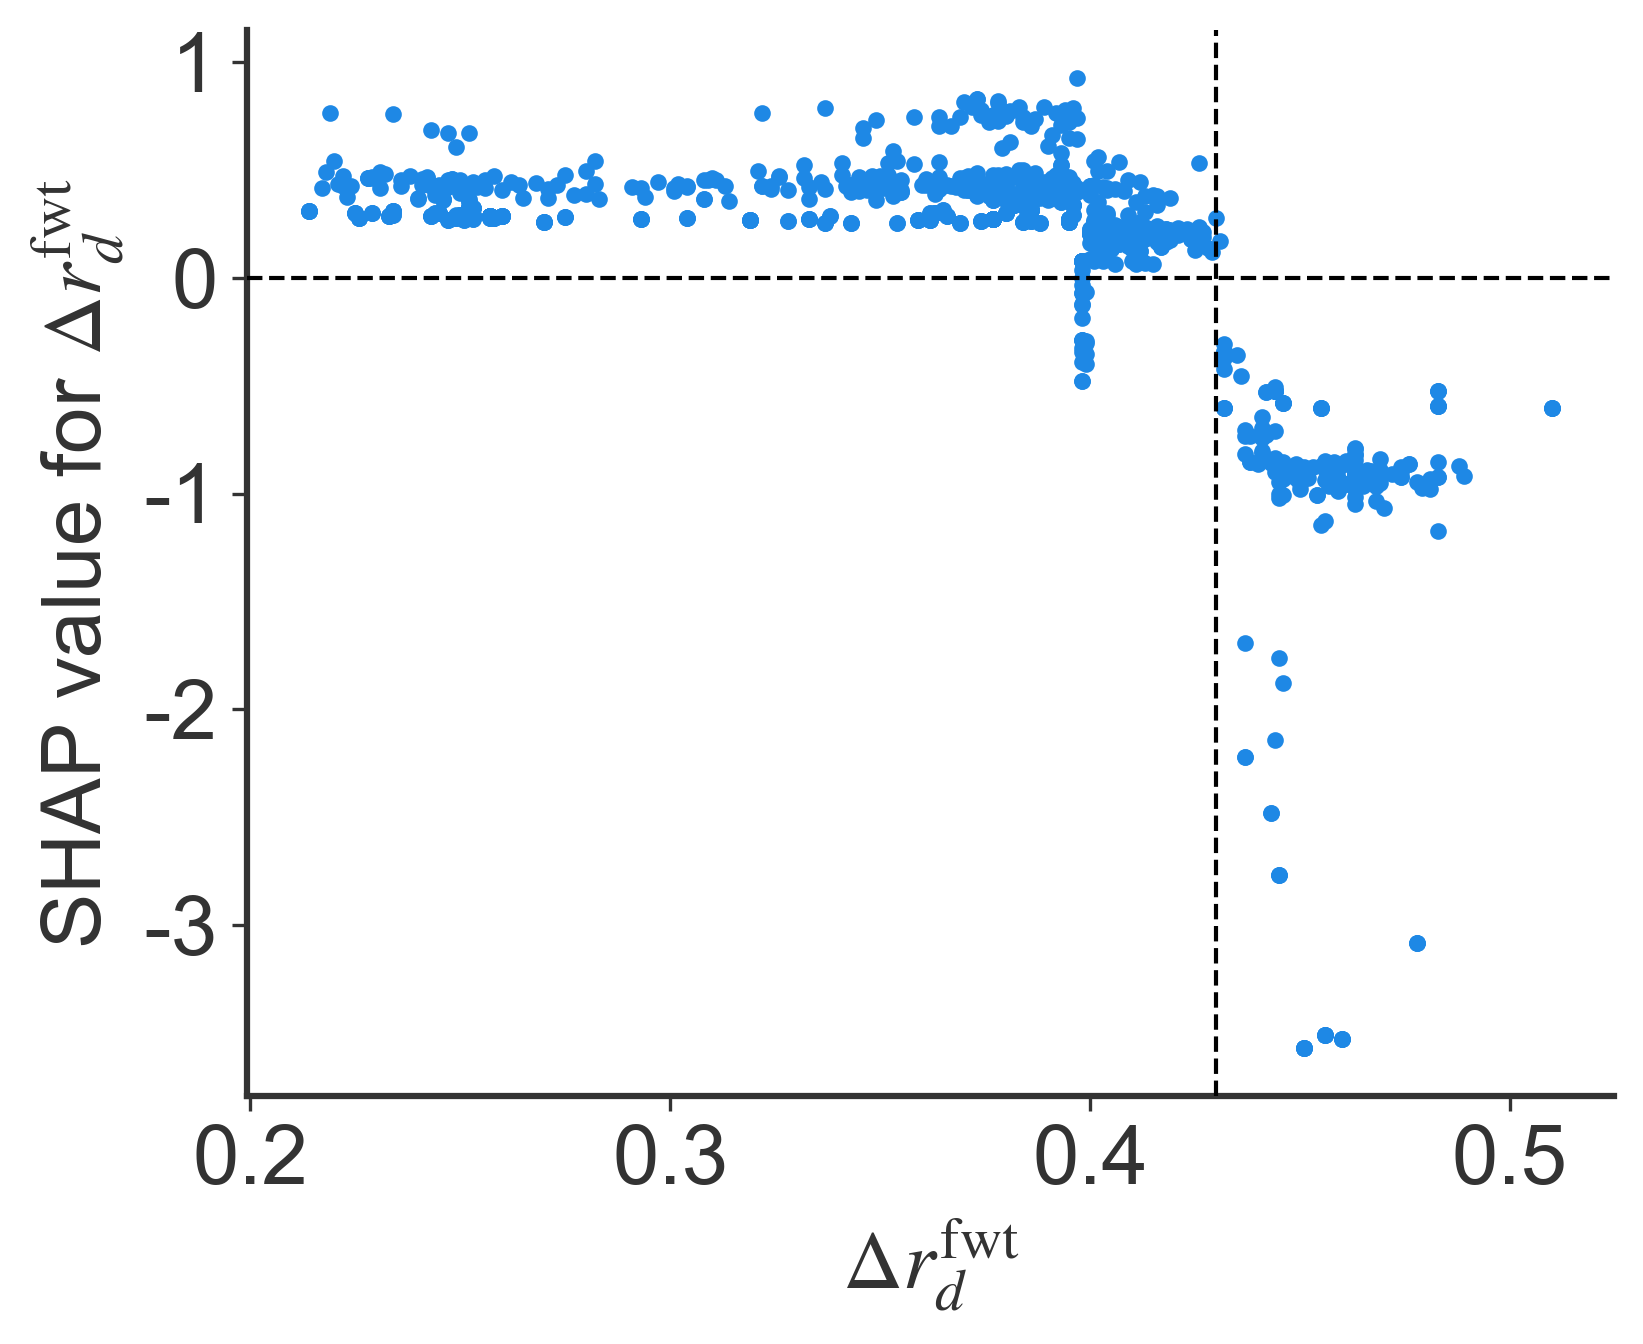

In [111]:
shap.plots.scatter(shap_values[:, 'fwtmean_rad_d_orb'], hist=False, show = False)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel(r"SHAP value for $\Delta r_{d}^{\mathrm{fwt}}$", fontsize=20)
#ax.set_ylabel(r"$F_{\mathrm{p}}$", fontsize=20)
ax.set_xlabel(r"$\Delta r_{d}^{\mathrm{fwt}}$", fontsize=20)
plt.tight_layout()
ax.axhline(y=0,color='black',linestyle='--',linewidth=1,zorder=3)
ax.axvline(x=0.43,color='black',linestyle='--',linewidth=1,zorder=3)
plt.savefig("./picture/sp_shap2.png", dpi=300, bbox_inches="tight")
plt.show()

# Screening candidate spaces

In [50]:
data = pd.read_csv('./data/data_tf.csv')
data = data.iloc[: ,:2]
data

formula  number
0      Li2NaBF6       1
1      Li2NaNF6       1
2     Li2CuAlF6       1
3      Li2CuPF6       1
4     Li2CuCrF6       1
...         ...     ...
9081  Nd2LiCuF6       3
9082  Nd2NaCuF6       3
9083  Eu2LiCuF6       3
9084  Tm2LiCuF6       3
9085  Yb2LiCuF6       3

[9086 rows x 2 columns]

In [51]:
X_s = get_magpie_plus_features(data['formula'])
X_s = X_s.drop('Unnamed: 272',axis=1)
X_s = X_s.reset_index()
X_s = X_s.drop('index',axis=1)
X_s = X_s.fillna(0)
X_s.columns = X_s.columns.str.replace(' ', '_')

Successfully generated 9086 chemical formula features！


In [54]:
X_s = X_s[feature_set]
X_s

mode_dipole  varianceAtomRadius  fwtmeandev_rad_p_orb  meandiff_workfn  \
0            3.74              80.402                 0.317            1.355   
1            3.74              81.106                 0.324            1.979   
2            3.74              77.050                 0.323            0.764   
3            3.74              76.309                 0.292            1.271   
4            3.74              77.807                 0.379            0.911   
...           ...                 ...                   ...              ...   
9081         3.74              80.835                 0.414            0.864   
9082         3.74              82.432                 0.525            0.924   
9083         3.74              80.835                 0.414            1.118   
9084         3.74              80.070                 0.414            0.856   
9085         3.74              80.070                 0.414            1.081   

      min_enthalpyAtomization  mode_rad_p_orb  maxdiff_mendeleevnum  \
0                        79.0           0.155                 105.0   
1                        79.0           0.155                 105.0   
2                        79.0           0.155                 105.0   
3                        79.0           0.155                 105.0   
4                        79.0           0.155                 105.0   
...                       ...             ...                   ...   
9081                     79.0           0.155                 105.0   
9082                     79.0           0.155                 104.0   
9083                     79.0           0.155                 105.0   
9084                     79.0           0.155                 105.0   
9085                     79.0           0.155                 105.0   

      Comp_L2Norm  maxdiff_atmnum  fwtmeandev_spheat  maxdiff_NdUnfValence  \
0           0.648             8.0            854.240                   0.0   
1           0.648             8.0            853.840                   0.0   
2           0.648            26.0            893.104                   0.0   
3           0.648            26.0            898.476                   0.0   
4           0.648            26.0            911.344                   5.0   
...           ...             ...                ...                   ...   
9081        0.648            57.0            528.432                   0.0   
9082        0.648            51.0            263.424                   0.0   
9083        0.648            60.0            528.752                   0.0   
9084        0.648            66.0            529.632                   0.0   
9085        0.648            67.0            529.872                   0.0   

      max_NsValence  meandiff_NsValence  min_period  fwtmean_zungerad  \
0               2.0               0.667         2.0             0.913   
1               2.0               0.667         2.0             0.887   
2               2.0               0.667         2.0             0.940   
3               2.0               0.667         2.0             0.896   
4               2.0               0.733         2.0             1.016   
...             ...                 ...         ...               ...   
9081            2.0               0.667         2.0             1.409   
9082            2.0               0.667         2.0             1.513   
9083            2.0               0.667         2.0             1.399   
9084            2.0               0.667         2.0             1.331   
9085            2.0               0.667         2.0             1.329   

      mode_NdUnfValence  maxdiff_totunfilledelec  fwtmean_mp  mode_atmwt  \
0                   0.0                      4.0     121.300        19.0   
1                   0.0                      2.0    -107.200        19.0   
2                   0.0                      4.0      78.462        19.0   
3                   0.0                      2.0      16.862        19.0  

In [56]:
sp = pd.DataFrame(columns=['formula','number'])
sp['formula'] = data['formula']
sp['number'] = data['number']

In [57]:
import joblib
xb_models = joblib.load('./model/sp_xgb_cn.joblib')

In [99]:
%%time
# integrated prediction
y_pred_ensemble = np.array([model.predict(X_s) for model in xb_models]).T
sp['sp'] = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=y_pred_ensemble)  
sp

CPU times: user 25.6 s, sys: 22.6 s, total: 48.2 s
Wall time: 505 ms


formula  number  sp
0      Li2NaBF6       1   1
1      Li2NaNF6       1   1
2     Li2CuAlF6       1   1
3      Li2CuPF6       1   1
4     Li2CuCrF6       1   1
...         ...     ...  ..
9081  Nd2LiCuF6       3   1
9082  Nd2NaCuF6       3   1
9083  Eu2LiCuF6       3   1
9084  Tm2LiCuF6       3   1
9085  Yb2LiCuF6       3   1

[9086 rows x 3 columns]

In [100]:
sp['sp'].value_counts()

sp
1    7037
0    2049
Name: count, dtype: int64

In [101]:
screen = sp.loc[sp['sp']==1, ['formula', 'number']]
screen

formula  number
0      Li2NaBF6       1
1      Li2NaNF6       1
2     Li2CuAlF6       1
3      Li2CuPF6       1
4     Li2CuCrF6       1
...         ...     ...
9081  Nd2LiCuF6       3
9082  Nd2NaCuF6       3
9083  Eu2LiCuF6       3
9084  Tm2LiCuF6       3
9085  Yb2LiCuF6       3

[7037 rows x 2 columns]

In [102]:
screen.to_csv('./data/screen.csv',index=False)